# setting

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

main_directory = '/content/drive/MyDrive/Colab Notebooks/Foiegras'

if not os.path.exists(main_directory):
    os.makedirs(main_directory)
    print(f"'{main_directory}' 디렉토리를 생성했습니다.")
else:
    print(f"'{main_directory}' 디렉토리가 이미 존재합니다.")

'/content/drive/MyDrive/Colab Notebooks/Foiegras' 디렉토리가 이미 존재합니다.


In [ ]:
os.chdir(main_directory)
print(f"'{os.getcwd()}' 디렉토리에서 작업 중입니다.")

'/content/drive/MyDrive/Colab Notebooks/Foiegras' 디렉토리에서 작업 중입니다.


# factsheet

- https://www.tigeretf.com/ko/pension/innovative-growth-theme/list.do

## extract content

In [ ]:
!pip install llama-index-readers-file pymupdf --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.9 MB/s eta 0:00:00


In [ ]:
# pdf to text

from llama_index.core import SimpleDirectoryReader
from llama_index.readers.file import PyMuPDFReader

file_names = os.listdir(os.path.join(main_directory, "dataset/etf_factsheet"))
sample_path = os.path.join(main_directory, "dataset/etf_factsheet", file_names[0])

loader = PyMuPDFReader()
document = loader.load_data(file_path=sample_path, metadata=True)
text = document[0].to_dict()['text']

useless_parts = ['* 포트폴리오정보는PDF 구성내역에기초한것으로실제보유내역과다를수있습니다.',
                 '* 상기업종비중은GICS 대분류기준입니다.',
                 '* 위의수익률정보는배당금재투자를가정하였음.', '단, 아래그래프는배당금제외한NAV 기준임.',
                 '변동성: 최근1년간일간수익률기준표준편차연환산(운용기간1년이내인경우전체운용일수기준)',
                 '* 위의수익률정보및아래그래프는운용기간중발생한분배금재투자를가정하였음.',
                 '※ ETF는실적배당상품으로운용결과에따른이익또는손실이투자자에게귀속됩니다.',
                 '※ 예금자보호법에따라예금보험공사가보호하지', '않으며, 원본의손실이발생할수있습니다.',
                 '※ ETF를취득하기전에(투자대상, 환매방법및보수등에관하여) 투자설명서를반드시읽어', '주시기바랍니다.',
                 '※ 과거의운용실적이미래의운용수익을보장하지않습니다.',
                 '홈페이지(www.tigeretf.com) 참조']

for useless_part in useless_parts:
    text = text.replace(useless_part, '')

text

'미래에셋TIGER Fn신재생에너지증권상장지수투자신탁(주식)\nTIGER Fn신재생에너지\n2024년5월31일기준\n(377990)\n기초지수\nFnGuide 신재생에너지지수는유가증권시장및코스닥상장\n종목의과거2년간리포트및공시보고서에텍스트마이닝\n기술을적용하여신재생에너지키워드유사도점수를산출한후\n점수가높은상위40개종목을선정한지수\n분배현황(최근2년)\n분배금지급일\n주당분배율(%)\n주당분배금(원)\n2024.05.03\n0.62\n52\n2023.05.03\n0.39\n40\n업종비중\nNo.\n업종\n비중(%)\n1\n산업재\n61.01\n2\n정보기술\n16.50\n3\n소재\n15.56\n4\n자유소비재\n4.36\n5\n유틸리티\n1.23\n6\n에너지\n1.11\n상위10종목\nNo. 종목명\n업종\n비중(%)\n1\n효성중공업\n22.40\n2\n두산에너빌리티\n10.87\n3\n두산퓨얼셀\n8.93\n4\n한화솔루션\n8.04\n5\nOCI\n7.52\n6\n씨에스윈드\n7.31\n7\n신성이엔지\n5.68\n8\n일진하이솔루스\n4.36\n9\n유니테스트\n4.24\n10\n지오릿에너지\n3.63\n\n\n기본정보\n최초설정일\n2021년3월4일\n기초자산\n국내주식\n순자산총액\n41,720백만원\n1주당순자산(NAV)\n10,301.34원\n총보수율(TER)\n연0.50 %\n분배금기준일\n1,4,7,10,12월마지막영업일\n집합투자업자(운용)\n미래에셋자산운용\n신탁업자(자산보관)\n한국씨티은행\n일반사무관리회사\n한국펀드파트너스\nAP/LP\n\n거래정보\n상장거래소\nKRX 유가증권시장\n상장코드\n377990\n블룸버그티커(펀드)\n377990 KS\n블룸버그티커(기초지수)\n-\n결제일\nT+2\n설정단위(CU)\n50,000주\n거래단위\n1주\n일거래량(최근3개월일평균)\n82,447주\n일거래대금(최근3개월일평균)\n826백만원\n종목명\nTIGER Fn신재생에너지\n운용성과(%)\n구분\n1M\n3M\n6M\n1Y\n3Y\n

In [ ]:
# text to dict

text_list = text.split('\n')
keywords = ['기초지수', '분배현황(최근2년)', '업종비중', '주요보유현황', '상위10종목', '기본정보', '거래정보', '운용성과(%)', '누적성과그래프', '투자포인트']

from collections import defaultdict

def split_text_by_keywords(text_list, keywords):
    result = defaultdict(list)
    current_keyword = None

    for item in text_list:
        if item in keywords:
            current_keyword = item
        elif current_keyword:
            result[current_keyword].append(item)

    if '누적성과그래프' in result:
        del result['누적성과그래프']

    return dict(result)

split_texts = split_text_by_keywords(text_list, keywords)
split_texts

{'기초지수': ['FnGuide 신재생에너지지수는유가증권시장및코스닥상장',
  '종목의과거2년간리포트및공시보고서에텍스트마이닝',
  '기술을적용하여신재생에너지키워드유사도점수를산출한후',
  '점수가높은상위40개종목을선정한지수'],
 '분배현황(최근2년)': ['분배금지급일',
  '주당분배율(%)',
  '주당분배금(원)',
  '2024.05.03',
  '0.62',
  '52',
  '2023.05.03',
  '0.39',
  '40'],
 '업종비중': ['No.',
  '업종',
  '비중(%)',
  '1',
  '산업재',
  '61.01',
  '2',
  '정보기술',
  '16.50',
  '3',
  '소재',
  '15.56',
  '4',
  '자유소비재',
  '4.36',
  '5',
  '유틸리티',
  '1.23',
  '6',
  '에너지',
  '1.11'],
 '상위10종목': ['No. 종목명',
  '업종',
  '비중(%)',
  '1',
  '효성중공업',
  '22.40',
  '2',
  '두산에너빌리티',
  '10.87',
  '3',
  '두산퓨얼셀',
  '8.93',
  '4',
  '한화솔루션',
  '8.04',
  '5',
  'OCI',
  '7.52',
  '6',
  '씨에스윈드',
  '7.31',
  '7',
  '신성이엔지',
  '5.68',
  '8',
  '일진하이솔루스',
  '4.36',
  '9',
  '유니테스트',
  '4.24',
  '10',
  '지오릿에너지',
  '3.63',
  '',
  ''],
 '기본정보': ['최초설정일',
  '2021년3월4일',
  '기초자산',
  '국내주식',
  '순자산총액',
  '41,720백만원',
  '1주당순자산(NAV)',
  '10,301.34원',
  '총보수율(TER)',
  '연0.50 %',
  '분배금기준일',
  '1,4,7,10,12월마지막영업일',
  '집합투자업자(운용)',
  '미래에셋자산운용',


In [ ]:
# dict to refined text (clova)

import requests

class ClovaChat:
    def __init__(self, host, api_key, api_key_primary_val, request_id):
        self._host = host
        self._api_key = api_key
        self._api_key_primary_val = api_key_primary_val
        self._request_id = request_id

    def execute(self, completion_request):
        headers = {
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id,
            'Content-Type': 'application/json; charset=utf-8',
            'Accept': 'text/event-stream'
        }

        result_data = None

        with requests.post(self._host + '/testapp/v1/chat-completions/HCX-003',
                           headers=headers, json=completion_request, stream=True) as r:
            for line in r.iter_lines():
                if line:
                    decoded_line = line.decode("utf-8")
                    print(decoded_line)
                    if 'seed' in decoded_line:
                        result_data = decoded_line

        return result_data


if __name__ == '__main__':
    clova_extract = ClovaChat(
        host='https://clovastudio.stream.ntruss.com',
        api_key='MASKED',
        api_key_primary_val='MASKED',
        request_id='MASKED'
    )

    preset_text = [{"role":"system",
                    "content": ' '.join(["<overall>",
                                         "당신은 증권 전문가입니다.",
                                         "미래에셋 ETF의 운용보고서(factsheet)에서 추출한 텍스트를 딕셔너리 형태로 받을 것입니다.",
                                         "<schema>",
                                         "'기초지수', '투자포인트': 단순 분기된 문장들이므로, 이어 붙이고 띄어쓰기 교정 필요.",
                                         "'분배현황(최근2년)': '분배금지급일', '주당분배율(%)', '주당분배금(원)",
                                         "'업종비중': 'No.', '업종', '비중(%)",
                                         "'상위10종목': 'No.', '종목명', '업종', '비중(%)' 이 때, '업종'은 기재되지 않을 수 있음.",
                                         "'주요보유현황': '구분', '종목명', '구분', '만기일', '계약수량(액면수량)', '평가금액(백만)', '비중(%)'",
                                         "'운용성과(%)': '구분', '1M', '3M', '6M', '1Y', '3Y', 'YTD', '설정이후', '변동성'",
                                         "'기본정보', '거래정보': 변수명과 값이 번갈아나옴.",
                                         "<output>",
                                         "각 Key를 단락명 삼아, 보고서 내용을 줄글로 정리하십시오.",
                                         "원 데이터를 반드시 모두 포함해서 작성하십시오.",
                                         "요약 및 분석하기보다, 딕셔너리에 담긴 정보를 사람이 잘 이해토록 하는 게 목적입니다."])},
                     {"role":"user","content":f"{split_texts}"}]

    request_data = {
        'messages': preset_text,
        'topP': 0.8,
        'topK': 0,
        'maxTokens': 2048,
        'temperature': 0.2, 'repeatPenalty': 1.2, # 정보 추출 -> 정형화
        'stopBefore': [],
        'includeAiFilters': True,
        'seed': 42
    }

    output = clova_extract.execute(request_data)

id:465475e9-f308-4fb5-b8c8-8b81ea3f61b7
event:token
data:{"message":{"role":"assistant","content":"T"},"index":0,"inputLength":1122,"outputLength":1,"stopReason":null}
id:85c60812-1704-40b4-b87d-d2d9f0d4e41f
event:token
data:{"message":{"role":"assistant","content":"IG"},"index":0,"inputLength":1122,"outputLength":1,"stopReason":null}
id:d7aedb98-5ecc-4994-997c-250f6af572b3
event:token
data:{"message":{"role":"assistant","content":"ER"},"index":0,"inputLength":1122,"outputLength":1,"stopReason":null}
id:b022b2af-f3f5-4a79-93aa-dccacc727710
event:token
data:{"message":{"role":"assistant","content":" Fn"},"index":0,"inputLength":1122,"outputLength":1,"stopReason":null}
id:0cd5b11a-e7f1-4624-b008-770ce39bfa30
event:token
data:{"message":{"role":"assistant","content":"신"},"index":0,"inputLength":1122,"outputLength":1,"stopReason":null}
id:84da8235-791f-48b9-ade5-c541e19c8661
event:token
data:{"message":{"role":"assistant","content":"재생"},"index":0,"inputLength":1122,"outputLength":1,"stopR

In [ ]:
# refined text

import json

content = json.loads(output.replace('data:', ''))['message']['content']
content

'TIGER Fn신재생에너지는 FnGuide 신재생에너지지수를 기초지수로 하여 1주당순자산(NAV) 10,301.34원, 총보수율(TER) 연0.50 %로 운용됩니다. FnGuide 신재생에너지지수는 유가증권시장 및 코스닥 상장 종목의 과거 2년간 리포트 및 공시 보고서에 텍스트 마이닝 기술을 적용하여 신재생에너지 키워드 유사도 점수를 산출한 후 점수가 높은 상위 40개 종목을 선정한 지수입니다.\n\n분배금기준일은 1,4,7,10,12월 마지막영업일이며, 최근 2년간 분배금지급일, 주당분배율(%), 주당분배금(원)은 각각 2024.05.03, 0.62, 52, 2023.05.03, 0.39, 40입니다.\n\n업종별 비중은 산업재 61.01%, 정보기술 16.50%, 소재 15.56%, 자유소비재 4.36%, 유틸리티 1.23%, 에너지 1.11%이며, 상위 10종목은 효성중공업(22.40%), 두산에너빌리티(10.87%), 두산퓨얼셀(8.93%), 한화솔루션(8.04%), OCI(7.52%), 씨에스윈드(7.31%), 신성이엔지(5.68%), 일진하이솔루스(4.36%), 유니테스트(4.24%), 지오릿에너지(3.63%)입니다.\n\n최초설정일은 2021년3월4일이며, 기초자산은 국내주식, 순자산총액은 41,720백만원입니다. 상장거래소는 KRX 유가증권시장, 상장코드 377990, 블룸버그티커(펀드) 377990 KS이며, 결제일은 T+2, 설정단위(CU) 50,000주, 거래단위 1주입니다. 최근 3개월 일평균 일거래량(최근3개월일평균)은 82,447주, 일거래대금(최근3개월일평균)은 826백만원입니다.\n\n운용성과(%)는 TIGER Fn신재생에너지가 1M 17.48, 3M 28.04, 6M 16.51, 1Y 6.02, 3Y 1.40, YTD 14.16, 설정이후 6.51, 변동성 27.35이며, FnGuide 신재생에너지지수는 1M 17.59, 3M 28.45, 6M 16.17, 1Y 6.04, 3Y 1.11, YTD 14.20, 설정이후 5.26, 

## summarize

In [ ]:
# dict to refined text (clova)

import requests


class ClovaChat:
    def __init__(self, host, api_key, api_key_primary_val, request_id):
        self._host = host
        self._api_key = api_key
        self._api_key_primary_val = api_key_primary_val
        self._request_id = request_id

    def execute(self, completion_request):
        headers = {
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id,
            'Content-Type': 'application/json; charset=utf-8',
            'Accept': 'text/event-stream'
        }

        result_data = None

        with requests.post(self._host + '/testapp/v1/chat-completions/HCX-003',
                           headers=headers, json=completion_request, stream=True) as r:
            for line in r.iter_lines():
                if line:
                    decoded_line = line.decode("utf-8")
                    print(decoded_line)
                    if 'seed' in decoded_line:
                        result_data = decoded_line

        return result_data


if __name__ == '__main__':
    clova_summary = ClovaChat(
        host='https://clovastudio.stream.ntruss.com',
        api_key='MASKED',
        api_key_primary_val='MASKED',
        request_id='MASKED'
    )

    preset_text = [{"role":"system",
                    "content": ' '.join(["<overall>",
                                         "당신은 증권 전문가입니다.",
                                         "미래에셋증권의 TIGER ETF (상장지수펀드) 상품을 평가 및 분석하여 개인의 투자 결정을 돕고자 합니다.",
                                         "운용보고서 (Factsheet) 내용의 요약본을 입력으로 받게 됩니다.",
                                         "<check points>",
                                         "수익률: 과거 수익률 데이터를 보고, 해당 ETF가 시장 벤치마크 (기초지수; TIGER 명칭이 붙지 않음) 와 비교했을 때의 성과를 분석합니다.",
                                         "비용: ETF의 운용 비용 비율을 확인하고, 다른 유사한 ETF와 비교하여 비용 효율성을 평가합니다.",
                                         "거래량: 일일 평균 거래량 데이터를 보고, 유동성 수준을 평가합니다.",
                                         "기초 자산: ETF가 추종하는 기초 자산 (주식, 채권, 원자재 등) 을 설명하고, 해당 자산군의 특성을 분석합니다.",
                                         "배당 수익률: 배당을 지급하는 ETF의 경우, 배당 수익률 데이터를 제공하고, 추가적인 수익 가능성을 평가합니다.",
                                         "자산 규모: ETF의 자산 규모 데이터를 제공하고, 유동성과 안정성을 평가합니다."
                                         "투자 포인트: 개인 투자자가 이 상품에 투자하면 좋을 이유, 자산군의 테마 등을 요약합니다.",
                                         "<output>",
                                         "위의 요소를 종합적으로 고려한 ETF의 평가 및 분석 결과를 제공하십시오.",
                                         "각 요소별로 상세한 데이터와 분석을 포함하여 종합적인 결론을 제시하십시오.",
                                         "판단의 경우 반드시 근거를 덧붙이십시오."])},
                     {"role":"user","content":f"{content}"}]

    request_data = {
        'messages': preset_text,
        'topP': 0.8,
        'topK': 0,
        'maxTokens': 2048,
        'temperature': 0.5, 'repeatPenalty': 5.0, # 보고서 요약 -> 다양한 표현
        'stopBefore': [],
        'includeAiFilters': True,
        'seed': 42
    }

    output = clova_summary.execute(request_data)

id:488f1388-8ec0-49c1-956d-5ab47fcbb7f4
event:token
data:{"message":{"role":"assistant","content":"T"},"index":0,"inputLength":896,"outputLength":1,"stopReason":null}
id:aba70262-d066-40d1-904d-1b4f108742ac
event:token
data:{"message":{"role":"assistant","content":"IG"},"index":0,"inputLength":896,"outputLength":1,"stopReason":null}
id:bf423661-7d61-4251-b8c7-7c4a162b874e
event:token
data:{"message":{"role":"assistant","content":"ER"},"index":0,"inputLength":896,"outputLength":1,"stopReason":null}
id:03fc91b4-d159-4212-82d5-e8f4f9323b91
event:token
data:{"message":{"role":"assistant","content":" Fn"},"index":0,"inputLength":896,"outputLength":1,"stopReason":null}
id:e50b5082-c673-4f4a-80e3-997a1c4ec75f
event:token
data:{"message":{"role":"assistant","content":"신"},"index":0,"inputLength":896,"outputLength":1,"stopReason":null}
id:ee28a3fa-0d67-4c78-81c4-8febb4fa7258
event:token
data:{"message":{"role":"assistant","content":"재생"},"index":0,"inputLength":896,"outputLength":1,"stopReason"

In [ ]:
# refined text

import json

summary = json.loads(output.replace('data:', ''))['message']['content']
summary

'TIGER Fn신재생에너지는 한국 주식 시장에서 신재생 에너지 분야에 투자하는 ETF로서, 다양한 업종과 기업에 분산되어 있는 것이 특징입니다. \n\n수익률 측면에서는 지난 1년 동안 6.02%의 수익률을 기록하며, 같은 기간 FnGuide 신재생에너지지수의 6.04%와 비슷한 성과를 보였습니다. 또한, 최근 3개월 동안에는 28.04%의 높은 수익률을 달성하였습니다. 이러한 성과는 국내외 신재생 에너지 산업의 성장과 함께 이루어진 것으로 보입니다.\n\n비용 측면에서는 TER이 연 0.50%로 상대적으로 낮은 편이어서 비용 효율성이 높다고 할 수 있습니다. 다만, 일부 경쟁 ETF 중에서는 더 낮은 보수율을 제공하는 상품도 있으므로 이를 고려할 필요가 있습니다.\n\n유동성과 자산규모 면에서는 아직 부족한 점이 있습니다.  하루 평균 거래량이 8만 2천 주 정도로 많은 편이 아니며, 자산 규모도 4,172억 원으로 대형 ETF에 비해 작은 편입니다. 이로 인해 매매 시 유동성 문제가 발생할 수 있으며, 펀드의 안정성에도 영향을 미칠 수 있습니다.\n\n국내외 신재생 에너지 산업의 성장세와 지속 가능한 발전에 대한 관심이 높아지고 있어 장기적인 관점에서 투자하기에 적합한 상품이라고 볼 수 있습니다. 하지만 앞서 언급한 유동성과 자산규모 문제를 고려하여 적절한 투자 금액과 타이밍을 선택하는 것이 중요합니다.'

## make embedding

In [ ]:
# embedding (clova)

import base64
import json
import http.client


class ClovaEmbedding:
    def __init__(self, host, api_key, api_key_primary_val, request_id):
        self._host = host
        self._api_key = api_key
        self._api_key_primary_val = api_key_primary_val
        self._request_id = request_id

    def _send_request(self, completion_request):
        headers = {
            'Content-Type': 'application/json; charset=utf-8',
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id
        }

        conn = http.client.HTTPSConnection(self._host)
        conn.request('POST', '/testapp/v1/api-tools/embedding/v2/bbdd4fe4d10e4114aa67715014ecf1af', json.dumps(completion_request), headers)
        response = conn.getresponse()
        result = json.loads(response.read().decode(encoding='utf-8'))
        conn.close()
        return result

    def execute(self, completion_request):
        res = self._send_request(completion_request)
        if res['status']['code'] == '20000':
            return res['result']['embedding']
        else:
            return 'Error'


if __name__ == '__main__':
    clova_embedding = ClovaEmbedding(
        host='clovastudio.apigw.ntruss.com',
        api_key='MASKED',
        api_key_primary_val = 'MASKED',
        request_id='MASKED'
    )

    content_embedding = clova_embedding.execute({"text": content})
    summary_embedding = clova_embedding.execute({"text": summary})

    print({"text": content})
    print(content_embedding)
    print({"text": summary})
    print(summary_embedding)


{'text': 'TIGER Fn신재생에너지는 FnGuide 신재생에너지지수를 기초지수로 하여 1주당순자산(NAV) 10,301.34원, 총보수율(TER) 연0.50 %로 운용됩니다. FnGuide 신재생에너지지수는 유가증권시장 및 코스닥 상장 종목의 과거 2년간 리포트 및 공시 보고서에 텍스트 마이닝 기술을 적용하여 신재생에너지 키워드 유사도 점수를 산출한 후 점수가 높은 상위 40개 종목을 선정한 지수입니다.\n\n분배금기준일은 1,4,7,10,12월 마지막영업일이며, 최근 2년간 분배금지급일, 주당분배율(%), 주당분배금(원)은 각각 2024.05.03, 0.62, 52, 2023.05.03, 0.39, 40입니다.\n\n업종별 비중은 산업재 61.01%, 정보기술 16.50%, 소재 15.56%, 자유소비재 4.36%, 유틸리티 1.23%, 에너지 1.11%이며, 상위 10종목은 효성중공업(22.40%), 두산에너빌리티(10.87%), 두산퓨얼셀(8.93%), 한화솔루션(8.04%), OCI(7.52%), 씨에스윈드(7.31%), 신성이엔지(5.68%), 일진하이솔루스(4.36%), 유니테스트(4.24%), 지오릿에너지(3.63%)입니다.\n\n최초설정일은 2021년3월4일이며, 기초자산은 국내주식, 순자산총액은 41,720백만원입니다. 상장거래소는 KRX 유가증권시장, 상장코드 377990, 블룸버그티커(펀드) 377990 KS이며, 결제일은 T+2, 설정단위(CU) 50,000주, 거래단위 1주입니다. 최근 3개월 일평균 일거래량(최근3개월일평균)은 82,447주, 일거래대금(최근3개월일평균)은 826백만원입니다.\n\n운용성과(%)는 TIGER Fn신재생에너지가 1M 17.48, 3M 28.04, 6M 16.51, 1Y 6.02, 3Y 1.40, YTD 14.16, 설정이후 6.51, 변동성 27.35이며, FnGuide 신재생에너지지수는 1M 17.59, 3M 28.45, 6M 16.17, 1Y 6.04, 3Y 1.11, YTD 14.20, 설정

## store

In [ ]:
import pandas as pd

factsheet_embedding_df = pd.DataFrame(columns=['code', 'month', 'content_embedding', 'summary_embbeding'])

code = file_names[0].split('_')[0]
month = int(file_names[0].split('_')[2][:-4])

factsheet_embedding_df.loc[len(factsheet_embedding_df)] = [code, month, content_embedding, summary_embedding]
factsheet_embedding_df

,code,month,content_embedding,summary_embbeding
0,377990,2405,"[-1.5927734, -0.69677734, -0.8979492, 0.309082...","[-1.5947266, -0.0047912598, -0.6347656, 0.2025..."


## [loop]

In [ ]:
from llama_index.core import SimpleDirectoryReader
from llama_index.readers.file import PyMuPDFReader
from collections import defaultdict
import requests
from tqdm import tqdm
import json
import base64
import http.client
import time

In [ ]:
useless_parts = ['* 포트폴리오정보는PDF 구성내역에기초한것으로실제보유내역과다를수있습니다.',
                 '* 상기업종비중은GICS 대분류기준입니다.',
                 '* 위의수익률정보는배당금재투자를가정하였음.', '단, 아래그래프는배당금제외한NAV 기준임.',
                 '변동성: 최근1년간일간수익률기준표준편차연환산(운용기간1년이내인경우전체운용일수기준)',
                 '* 위의수익률정보및아래그래프는운용기간중발생한분배금재투자를가정하였음.',
                 '※ ETF는실적배당상품으로운용결과에따른이익또는손실이투자자에게귀속됩니다.',
                 '※ 예금자보호법에따라예금보험공사가보호하지', '않으며, 원본의손실이발생할수있습니다.',
                 '※ ETF를취득하기전에(투자대상, 환매방법및보수등에관하여) 투자설명서를반드시읽어', '주시기바랍니다.',
                 '※ 과거의운용실적이미래의운용수익을보장하지않습니다.',
                 '홈페이지(www.tigeretf.com) 참조']

keywords = ['기초지수', '분배현황(최근2년)', '업종비중', '주요보유현황', '상위10종목', '기본정보', '거래정보', '운용성과(%)', '누적성과그래프', '투자포인트']

prompt_1 = ' '.join(["<overall>",
                     "당신은 증권 전문가입니다.",
                     "미래에셋 ETF의 운용보고서(factsheet)에서 추출한 텍스트를 딕셔너리 형태로 받을 것입니다.",
                     "<schema>",
                     "'기초지수', '투자포인트': 단순 분기된 문장들이므로, 이어 붙이고 띄어쓰기 교정 필요.",
                     "'분배현황(최근2년)': '분배금지급일', '주당분배율(%)', '주당분배금(원)",
                     "'업종비중': 'No.', '업종', '비중(%)",
                     "'상위10종목': 'No.', '종목명', '업종', '비중(%)' 이 때, '업종'은 기재되지 않을 수 있음.",
                     "'주요보유현황': '구분', '종목명', '구분', '만기일', '계약수량(액면수량)', '평가금액(백만)', '비중(%)'",
                     "'운용성과(%)': '구분', '1M', '3M', '6M', '1Y', '3Y', 'YTD', '설정이후', '변동성'",
                     "'기본정보', '거래정보': 변수명과 값이 번갈아나옴.",
                     "<output>",
                     "각 Key를 단락명 삼아, 보고서 내용을 줄글로 정리하십시오.",
                     "원 데이터를 반드시 모두 포함해서 작성하십시오.",
                     "요약 및 분석하기보다, 딕셔너리에 담긴 정보를 사람이 잘 이해토록 하는 게 목적입니다."])

prompt_2 = ' '.join(["<overall>",
                     "당신은 증권 전문가입니다.",
                     "미래에셋증권의 TIGER ETF (상장지수펀드) 상품을 평가 및 분석하여 개인의 투자 결정을 돕고자 합니다.",
                     "운용보고서 (Factsheet) 내용의 요약본을 입력으로 받게 됩니다.",
                     "<check points>", # 체크포인트 좀 더 고민해야. -> ETF 평가/비교 어떻게 하지?
                     "수익률: 과거 수익률 데이터를 보고, 해당 ETF가 시장 벤치마크 (기초지수; TIGER 명칭이 붙지 않음) 와 비교했을 때의 성과를 분석합니다.",
                     "비용: ETF의 운용 비용 비율을 확인하고, 다른 유사한 ETF와 비교하여 비용 효율성을 평가합니다.",
                     "거래량: 일일 평균 거래량 데이터를 보고, 유동성 수준을 평가합니다.",
                     "기초 자산: ETF가 추종하는 기초 자산 (주식, 채권, 원자재 등) 을 설명하고, 해당 자산군의 특성을 분석합니다.",
                     "배당 수익률: 배당을 지급하는 ETF의 경우, 배당 수익률 데이터를 제공하고, 추가적인 수익 가능성을 평가합니다.",
                     "자산 규모: ETF의 자산 규모 데이터를 제공하고, 유동성과 안정성을 평가합니다."
                     "투자 포인트: 개인 투자자가 이 상품에 투자하면 좋을 이유, 자산군의 테마 등을 요약합니다.",
                     "<output>",
                     "위의 요소를 종합적으로 고려한 ETF의 평가 및 분석 결과를 제공하십시오.",
                     "각 요소별로 상세한 데이터와 분석을 포함하여 종합적인 결론을 제시하십시오.",
                     "판단의 경우 반드시 근거를 덧붙이십시오."])

api_key = 'MASKED'
api_key_primary_val='MASKED'

In [ ]:
def split_text_by_keywords(text_list, keywords):
    result = defaultdict(list)
    current_keyword = None

    for item in text_list:
        if item in keywords:
            current_keyword = item
        elif current_keyword:
            result[current_keyword].append(item)

    if '누적성과그래프' in result:
        del result['누적성과그래프']

    return dict(result)


class ClovaChat:
    def __init__(self, host, api_key, api_key_primary_val, request_id):
        self._host = host
        self._api_key = api_key
        self._api_key_primary_val = api_key_primary_val
        self._request_id = request_id

    def execute(self, completion_request):
        headers = {
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id,
            'Content-Type': 'application/json; charset=utf-8',
            'Accept': 'text/event-stream'
        }

        result_data = None

        with requests.post(self._host + '/testapp/v1/chat-completions/HCX-003',
                           headers=headers, json=completion_request, stream=True) as r:
            for line in r.iter_lines():
                if line:
                    decoded_line = line.decode("utf-8")
                    # print(decoded_line)
                    if 'seed' in decoded_line:
                        result_data = decoded_line

        return result_data


class ClovaEmbedding:
    def __init__(self, host, api_key, api_key_primary_val, request_id):
        self._host = host
        self._api_key = api_key
        self._api_key_primary_val = api_key_primary_val
        self._request_id = request_id

    def _send_request(self, completion_request):
        headers = {
            'Content-Type': 'application/json; charset=utf-8',
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id
        }

        conn = http.client.HTTPSConnection(self._host)
        conn.request('POST', '/testapp/v1/api-tools/embedding/v2/bbdd4fe4d10e4114aa67715014ecf1af', json.dumps(completion_request), headers)
        response = conn.getresponse()
        result = json.loads(response.read().decode(encoding='utf-8'))
        conn.close()
        return result

    def execute(self, completion_request):
        res = self._send_request(completion_request)
        if res['status']['code'] == '20000':
            return res['result']['embedding']
        else:
            return 'Error'

In [ ]:
# 1. pdf to text

file_names = os.listdir(os.path.join(main_directory, "dataset/etf_factsheet")) # 다 받으면 180개 정도
factsheet_embedding_df = pd.DataFrame(columns=['code', 'month', 'content', 'content_embedding', 'summary', 'summary_embedding'])

for file_name in tqdm(file_names, desc='Processing ETF Factsheets'):

    time.sleep(30) # API 호출 제한

    sample_path = os.path.join(main_directory, "dataset/etf_factsheet", file_name)
    loader = PyMuPDFReader()
    document = loader.load_data(file_path=sample_path, metadata=True)
    text = document[0].to_dict()['text']

    for useless_part in useless_parts:
        text = text.replace(useless_part, '')

    # 2. text to dict

    text_list = text.split('\n')
    split_texts = split_text_by_keywords(text_list, keywords)

    clova_extract = ClovaChat(
        host='https://clovastudio.stream.ntruss.com',
        api_key=api_key,
        api_key_primary_val=api_key_primary_val,
        request_id='MASKED'
        )

    preset_text = [{"role":"system", "content": prompt_1}, {"role":"user","content":f"{split_texts}"}]

    request_data_1 = {
        'messages': preset_text,
        'topP': 0.8,
        'topK': 0,
        'maxTokens': 2048,
        'temperature': 0.2, 'repeatPenalty': 1.2, # 정보 추출 -> 정형화
        'stopBefore': [],
        'includeAiFilters': True,
        'seed': 42
        }

    output = clova_extract.execute(request_data_1)
    content = json.loads(output.replace('data:', ''))['message']['content']

    # 3. summarize

    clova_summary = ClovaChat(
        host='https://clovastudio.stream.ntruss.com',
        api_key=api_key,
        api_key_primary_val=api_key_primary_val,
        request_id='MASKED'
        )

    preset_text = [{"role":"system", "content": prompt_2}, {"role":"user","content":f"{content}"}]

    request_data_2 = {
        'messages': preset_text,
        'topP': 0.8,
        'topK': 0,
        'maxTokens': 2048,
        'temperature': 0.5, 'repeatPenalty': 5.0, # 보고서 요약 -> 다양한 표현
        'stopBefore': [],
        'includeAiFilters': True,
        'seed': 42
        }

    output = clova_summary.execute(request_data_2)
    summary = json.loads(output.replace('data:', ''))['message']['content']

    # 4. make embedding

    clova_embedding = ClovaEmbedding(
        host='clovastudio.apigw.ntruss.com',
        api_key=api_key,
        api_key_primary_val=api_key_primary_val,
        request_id='MASKED'
        )

    request_data_3 = {"text": content}
    content_embedding = clova_embedding.execute(request_data_3)

    request_data_4 = {"text": summary}
    summary_embedding = clova_embedding.execute(request_data_4)

    # 5. store

    code = file_name.split('_')[0]
    month = int(file_name.split('_')[2][:-4])

    factsheet_embedding_df.loc[len(factsheet_embedding_df)] = [code, month, content, content_embedding, summary, summary_embedding]

Processing ETF Factsheets: 100%|██████████| 24/24 [30:39<00:00, 76.63s/it]


In [ ]:
import pandas as pd

file_path = os.path.join(main_directory, "dataset", "factsheet_embedding.csv")

if os.path.exists(file_path):
    factsheet_embedding_df = pd.read_csv(file_path)
    print("Loaded from CSV")
else:
    factsheet_embedding_df.to_csv(file_path, index=False)
    print("Saved to CSV")

Loaded from CSV


In [ ]:
factsheet_embedding_df

,code,month,content,content_embedding,summary,summary_embedding
0,377990,2405,TIGER Fn신재생에너지는 FnGuide 신재생에너지지수를 기초지수로 하여 1주당...,"[-1.5927734, -0.69677734, -0.8979492, 0.309082...",TIGER Fn신재생에너지는 한국 주식 시장에서 신재생 에너지 분야에 투자하는 ET...,"[-1.5947266, -0.0047912598, -0.6347656, 0.2025..."
1,394670,2405,TIGER 글로벌리튬&2차전지SOLACTIVE(합성) ETF는 Solactive G...,"[-1.2216797, -0.3486328, -0.32495117, -0.13232...",TIGER 글로벌리튬&2차전지SOLACTIVE(합성) ETF는 최근 각광받고 있는 ...,"[-1.6972656, 0.48706055, -0.19335938, 0.385742..."
2,364990,2405,TIGER 게임 TOP10 ETF는 KRX 게임 TOP 10 지수를 기초지수로 하여...,"[-1.0996094, -0.70996094, -0.29370117, 0.71093...",TIGER 게임 TOP10 ETF는 국내 게임 산업을 대표하는 종목들에 분산투자할 ...,"[-1.5673828, -0.5332031, -1.1533203, 0.7495117..."
3,371470,2405,TIGER 차이나바이오테크SOLACTIVE ETF는 Solactive China B...,"[-1.3388672, 0.13415527, -1.5439453, 0.0494689...",TIGER 차이나바이오테크SOLACTIVE ETF는 중국 생명공학 기업들을 최대 3...,"[-1.5107422, -0.6196289, -0.90722656, -0.00032..."
4,463250,2405,TIGER 스페이스테크iSelect ETF는 iSelect 스페이스테크지수를 기초지...,"[-2.3847656, -0.3503418, -0.5131836, 0.5874023...","TIGER 스페이스테크iSelect ETF는 국내 우주항공, 인공지능, 로봇 및 3...","[-2.7695312, 0.17663574, -0.46264648, 0.409912..."
5,441680,2405,Cboe Nasdaq-100 BuyWrite V2 지수(Total Return)는 ...,"[-2.359375, -0.52246094, -0.6972656, 1.3681641...",TIGER 미국나스닥100커버드콜(합성) ETF는 Cboe Nasdaq-100 Bu...,"[-1.7822266, -1.2509766, -0.60839844, 0.602539..."
6,A465670,2405,TIGER 미국캐시카우100 ETF는 Global X U.S. Cash Flow K...,"[-1.0820312, -1.4580078, -0.0423584, 1.1464844...",TIGER 미국캐시카우100 ETF는 글로벌X US 캐시플로우 킹 100 인덱스를 ...,"[-0.7480469, -1.5019531, -0.29052734, 1.150390..."
7,456610,2405,TIGER 미국달러SOFR금리액티브(합성) ETF는 Solactive SOFR Da...,"[-0.56933594, -1.1240234, -0.7729492, 0.583007...",TIGER 미국달러SOFR금리액티브(합성) ETF는 국내 최초로 미국 달러 기반의 ...,"[-0.84521484, -1.2880859, -0.64160156, 1.18457..."
8,480260,2405,TIGER 27-04회사채(A+이상)액티브 ETF는 2024년 4월 17일에 최초 ...,"[-1.2646484, -0.6538086, 0.058380127, 0.750488...",TIGER 27-04회사채(A+이상)액티브 ETF는 국내 채권을 기초자산으로 하는 ...,"[-1.1591797, -0.92871094, -0.13244629, 0.73828..."
9,451540,2405,TIGER 종합채권(AA-이상)액티브 ETF는 KIS 종합채권AA-이상총수익지수(T...,"[-0.84033203, -0.9213867, 0.024810791, 0.45581...",TIGER 종합채권(AA-이상)액티브 ETF는 국내 채권 시장에 투자하는 ETF로서...,"[-0.5317383, -1.0263672, -0.033935547, 0.60791..."


## [simple pca]

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import ast
from sklearn.cluster import KMeans

def convert_to_list(embedding_str):
    return ast.literal_eval(embedding_str)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


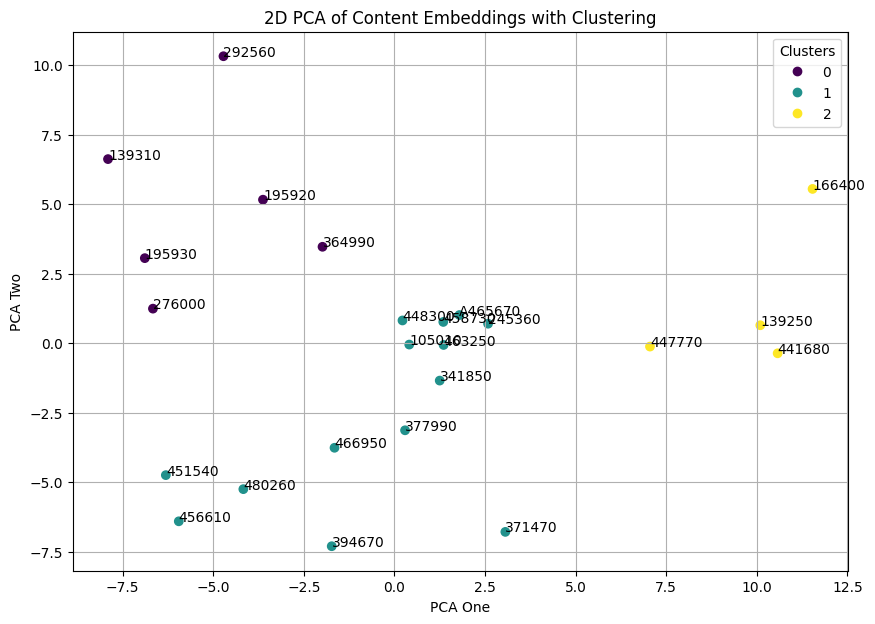

In [ ]:
# content_embedding

df_1 = factsheet_embedding_df.copy()

df_1['content_embedding'] = df_1['content_embedding'].apply(convert_to_list)
embedding_data_1 = df_1['content_embedding'].tolist()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_data_1)

df_1['pca_one'] = pca_result[:,0]
df_1['pca_two'] = pca_result[:,1]

kmeans = KMeans(n_clusters=3)
df_1['cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_1['pca_one'], df_1['pca_two'], c=df_1['cluster'], cmap='viridis')

for i, txt in enumerate(df_1['code']):
    plt.annotate(txt, (df_1['pca_one'][i], df_1['pca_two'][i]))

plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.title('2D PCA of Content Embeddings with Clustering')
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


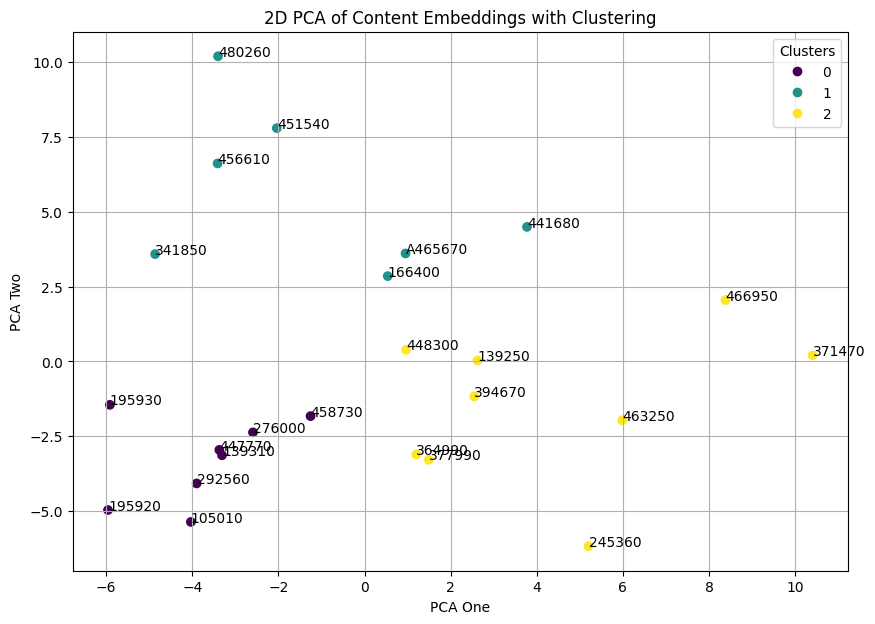

In [ ]:
# summary_embedding

df_2 = factsheet_embedding_df.copy()

df_2['summary_embedding'] = df_2['summary_embedding'].apply(convert_to_list)
embedding_data_2 = df_2['summary_embedding'].tolist()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_data_2)

df_2['pca_one'] = pca_result[:,0]
df_2['pca_two'] = pca_result[:,1]

kmeans = KMeans(n_clusters=3)
df_2['cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_2['pca_one'], df_2['pca_two'], c=df_2['cluster'], cmap='viridis')

for i, txt in enumerate(df_2['code']):
    plt.annotate(txt, (df_2['pca_one'][i], df_2['pca_two'][i]))

plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.title('2D PCA of Content Embeddings with Clustering')
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


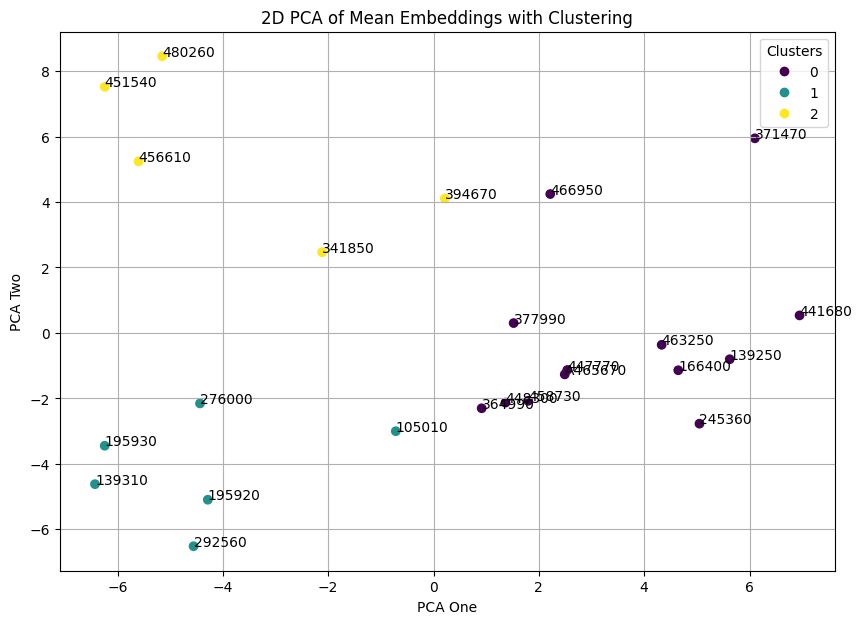

In [ ]:
# mean

df_3 = factsheet_embedding_df.copy()

df_3['content_embedding'] = df_1['content_embedding']
df_3['summary_embedding'] = df_2['summary_embedding']
df_3['mean_embedding'] = df_3.apply(lambda row: list(np.mean([row['content_embedding'], row['summary_embedding']], axis=0)), axis=1)

embedding_data_3 = df_3['mean_embedding'].tolist()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_data_3)

df_3['pca_one'] = pca_result[:,0]
df_3['pca_two'] = pca_result[:,1]

kmeans = KMeans(n_clusters=3)
df_3['cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_3['pca_one'], df_3['pca_two'], c=df_3['cluster'], cmap='viridis')

for i, txt in enumerate(df_3['code']):
    plt.annotate(txt, (df_3['pca_one'][i], df_3['pca_two'][i]))

plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.title('2D PCA of Mean Embeddings with Clustering')
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [ ]:
df_3[df_3['code'].isin(['451540', '480260', '456610'])] # 좌상단 -> 안전자산

,code,month,content,content_embedding,summary,summary_embedding,mean_embedding,pca_one,pca_two,cluster,cosine_similarity
7,456610,2405,TIGER 미국달러SOFR금리액티브(합성) ETF는 Solactive SOFR Da...,"[-0.56933594, -1.1240234, -0.7729492, 0.583007...",TIGER 미국달러SOFR금리액티브(합성) ETF는 국내 최초로 미국 달러 기반의 ...,"[-0.84521484, -1.2880859, -0.64160156, 1.18457...","[-0.70727539, -1.20605465, -0.70727538, 0.8837...",-5.599664,5.241530,2,0.370817
8,480260,2405,TIGER 27-04회사채(A+이상)액티브 ETF는 2024년 4월 17일에 최초 ...,"[-1.2646484, -0.6538086, 0.058380127, 0.750488...",TIGER 27-04회사채(A+이상)액티브 ETF는 국내 채권을 기초자산으로 하는 ...,"[-1.1591797, -0.92871094, -0.13244629, 0.73828...","[-1.2119140499999999, -0.7912597699999999, -0....",-5.150182,8.455136,2,0.350052
9,451540,2405,TIGER 종합채권(AA-이상)액티브 ETF는 KIS 종합채권AA-이상총수익지수(T...,"[-0.84033203, -0.9213867, 0.024810791, 0.45581...",TIGER 종합채권(AA-이상)액티브 ETF는 국내 채권 시장에 투자하는 ETF로서...,"[-0.5317383, -1.0263672, -0.033935547, 0.60791...","[-0.6860351650000001, -0.97387695, -0.00456237...",-6.241973,7.518884,2,0.356785


In [ ]:
df_3[df_3['code'].isin(['139310', '195930', '195920'])] # 좌하단 -> ?

,code,month,content,content_embedding,summary,summary_embedding,mean_embedding,pca_one,pca_two,cluster,cosine_similarity
15,195930,2405,TIGER 유로스탁스50(합성H) ETF는 EURO STOXX 50 Index를 기...,"[-0.5258789, -1.3505859, -0.4790039, 1.6386719...",TIGER 유로스탁스50(합성H) ETF는 EURO STOXX 50 Index를 기...,"[-0.8041992, -0.65283203, -0.37768555, 1.79199...","[-0.6650390500000001, -1.001708965, -0.4283447...",-6.243054,-3.446715,1,0.373812
16,195920,2405,TIGER 일본TOPIX(합성H) ETF는 일본의 TOPIX Index를 기초지수로...,"[-1.1806641, -1.8583984, -0.14257812, 0.867675...","TIGER 일본TOPIX(합성H) ETF는 일본 주식 시장에 투자하는 ETF로서, ...","[-1.0898438, -1.4404297, -0.17175293, 1.285156...","[-1.13525395, -1.6494140499999999, -0.15716552...",-4.285300,-5.096839,1,0.409548
20,139310,2405,TIGER 금속선물(H) ETF는 S&P GSCI Industrial Metals ...,"[-1.3984375, -0.88671875, -0.63623047, 0.85302...",TIGER 금속선물(H) ETF는 금속 선물에 대한 투자 기회를 제공하는 상품으로서...,"[-1.6582031, -0.6694336, -0.6953125, 0.9912109...","[-1.5283202999999999, -0.778076175, -0.6657714...",-6.427220,-4.620555,1,0.409110


In [ ]:
df_3[df_3['code'].isin(['447770', 'A465670', '458730'])] # 중앙 -> 미국

,code,month,content,content_embedding,summary,summary_embedding,mean_embedding,pca_one,pca_two,cluster,cosine_similarity
6,A465670,2405,TIGER 미국캐시카우100 ETF는 Global X U.S. Cash Flow K...,"[-1.0820312, -1.4580078, -0.0423584, 1.1464844...",TIGER 미국캐시카우100 ETF는 글로벌X US 캐시플로우 킹 100 인덱스를 ...,"[-0.7480469, -1.5019531, -0.29052734, 1.150390...","[-0.9150390500000001, -1.47998045, -0.16644287...",2.491612,-1.266312,0,0.420348
10,447770,2405,FnGuide 테슬라채권혼합지수는 해외주식 테슬라(Tesla)와 국내채권 두 종류의...,"[-0.86376953, -1.1220703, -0.5654297, -0.10638...",TIGER 테슬라채권혼합Fn ETF는 테슬라 주식과 국내 채권에 분산 투자하는 상품...,"[-0.73291016, -0.8383789, -0.1685791, 0.438476...","[-0.798339845, -0.9802246000000001, -0.3670044...",2.539516,-1.132794,0,0.440658
17,458730,2405,TIGER 미국배당다우존스 ETF는 Dow Jones U.S. Dividend 10...,"[-2.0976562, -0.92578125, -0.30371094, 0.19409...",TIGER 미국배당 다우존스 ETF는 꾸준한 배당 성장과 함께 탄탄한 재무구조를 갖...,"[-1.8886719, -0.7578125, -0.32641602, 0.292968...","[-1.9931640499999999, -0.841796875, -0.3150634...",1.797278,-2.074116,0,0.452426


# prospectus

- llama로 긁기보다, 엑셀 하나 만드는 게 빠를듯

## risk level

In [ ]:
# 위험 5단계

## pension allowed

In [ ]:
# 개인/퇴직 연금, 혹은 불가

# user info

## know your customer

In [ ]:
# 투자성향 5단계 (계좌 만들 때 하는 것, 필요하면 산식 찾아보기)

## conversation

In [ ]:
# 대화를 통한 추가 정보 (얘도 대안이 필요. 긍정/부정 나눠 받든지 혹은 summary 한 번 거치든지.)

safe_comment = ' '.join(["저는 45세의 중학교 교사로, 안정적인 월급을 받고 있습니다.",
                         "가족은 아내와 두 아이가 있으며, 큰 재정적 변동 없이 안정적인 생활을 유지하고 싶습니다.",
                         "현재 주택 대출이 조금 남아있어, 큰 위험을 감수하기보다는 꾸준히 조금씩 수익을 얻을 수 있는 상품을 선호합니다.",
                         "주식 시장의 변동성에 너무 크게 영향을 받지 않는, 상대적으로 안정적인 상품을 원합니다.",
                         "예를 들어, 배당금을 꾸준히 지급하는 우량 기업에 투자하는 ETF나, 정부 발행 채권에 투자하는 ETF가 좋을 것 같습니다."])
risk_comment = ' '.join(["저는 35세의 IT 기업에서 일하는 중간 관리자입니다.",
                         "현재 미혼이며, 월급 외에도 주식과 암호화폐 등 다양한 투자에서 수익을 내고 있습니다.",
                         "리스크를 감수할 수 있는 여유 자금이 꽤 있습니다.",
                         "저는 높은 수익을 기대하며, 어느 정도의 리스크를 감수할 준비가 되어 있습니다.",
                         "주식 시장의 급격한 변화에도 빠르게 대응할 수 있는, 성장 가능성이 높은 분야에 투자하는 ETF가 좋을 것 같습니다.",
                         "예를 들어, 기술주 중심의 ETF나 신흥 시장에 투자하는 ETF를 원합니다."])

clova_conversation = ClovaEmbedding(
    host='clovastudio.apigw.ntruss.com',
    api_key=api_key,
    api_key_primary_val=api_key_primary_val,
    request_id='MASKED'
    )

request_data_5 = {"text": safe_comment}
safe_conversation_embedding = clova_conversation.execute(request_data_5)

request_data_6 = {"text": risk_comment}
risk_conversation_embedding = clova_conversation.execute(request_data_6)

print(request_data_5)
print(safe_conversation_embedding)

print(request_data_6)
print(risk_conversation_embedding)

{'text': '저는 45세의 중학교 교사로, 안정적인 월급을 받고 있습니다. 가족은 아내와 두 아이가 있으며, 큰 재정적 변동 없이 안정적인 생활을 유지하고 싶습니다. 현재 주택 대출이 조금 남아있어, 큰 위험을 감수하기보다는 꾸준히 조금씩 수익을 얻을 수 있는 상품을 선호합니다. 주식 시장의 변동성에 너무 크게 영향을 받지 않는, 상대적으로 안정적인 상품을 원합니다. 예를 들어, 배당금을 꾸준히 지급하는 우량 기업에 투자하는 ETF나, 정부 발행 채권에 투자하는 ETF가 좋을 것 같습니다.'}
[-1.4677734, -0.28125, -0.8979492, 0.20507812, 0.18835449, -0.41992188, 0.62841797, 0.86328125, -0.20251465, -0.20959473, 0.5913086, 0.58691406, -1.3994141, -1.2617188, 0.36376953, -0.6723633, 0.9291992, -0.6801758, -1.6318359, -0.5498047, -0.68310547, 0.3618164, 0.94384766, 0.69873047, 0.6738281, 0.24597168, -1.5058594, -0.74316406, -0.46313477, 1.5888672, 0.53759766, 1.0244141, -0.04043579, -0.54052734, -0.68603516, 0.5605469, 0.8466797, -2.3203125, -0.61035156, -0.30004883, 0.34155273, 0.94873047, 0.13305664, -0.13110352, 0.5551758, -0.90771484, -1.3730469, -0.4128418, 0.074157715, -0.92529297, -0.1381836, -0.28076172, 1.4707031, -0.3161621, 1.8291016, 0.6894531, -0.004714966, -0.022994995, -0.34594727, -0

In [ ]:
user_comment = "인생은 한방이다. 나는 미국 기술주 신봉자. 엄마 난 커서 일론 머스크가 될래요. 고수익 최고! 스무살 젊은 나. 리스크 돈워리. 돈복사 엔비디아, 나스닥, AI 지금이니!"
# user_comment = "안전이 최고. 테슬라 나이롱마스크 사기꾼. 든든한 국밥같은 채권, 엔화 얼마나 좋을까. 에너지 자원도 착착 구매해두면 참 좋을듯. 난 미래가 두려운 쫄보맨."

request_data_7 = {"text": user_comment}
user_conversation_embedding = clova_conversation.execute(request_data_7)

print(request_data_7)
print(user_conversation_embedding)

{'text': '인생은 한방이다. 나는 미국 기술주 신봉자. 엄마 난 커서 일론 머스크가 될래요. 고수익 최고! 스무살 젊은 나. 리스크 돈워리. 돈복사 엔비디아, 나스닥, AI 지금이니!'}
[-0.06500244, 0.14978027, -0.5996094, -0.2824707, -1.1533203, 0.05307007, -0.5683594, -0.022109985, 1.2978516, 0.2512207, -0.5703125, 0.06286621, -0.25195312, -0.6113281, -0.45263672, -0.49047852, 0.4321289, -0.44262695, -0.6645508, -0.3840332, 0.12042236, 0.79003906, -0.04977417, 0.23083496, -0.17456055, 0.82666016, -0.27514648, -0.63964844, -0.26220703, 0.20092773, -0.9785156, 0.28027344, -0.0019836426, -1.1083984, -0.49365234, -0.04348755, 0.11639404, -0.5732422, -0.78125, -0.06640625, 1.2890625, 0.5307617, 0.19067383, -0.31347656, 0.5620117, -0.58203125, -0.30639648, -0.08520508, -0.5576172, -0.36450195, 0.027893066, 0.11987305, -0.023864746, -0.11016846, 0.91796875, -0.6533203, -0.2902832, -0.8808594, -0.8076172, 0.09466553, 0.32006836, -0.52978516, -0.18347168, 0.08496094, -0.7182617, 2.7636719, -0.033721924, 0.83154297, -0.1652832, -0.87939453, -0.62109375, 0.37963867, -0

# recommend

## similarity

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarities = cosine_similarity([user_conversation_embedding], np.array(embedding_data_3)).flatten()
df_3['cosine_similarity'] = cosine_similarities
df_3_sorted = df_3.sort_values(by='cosine_similarity', ascending=False)

df_3_sorted

,code,month,content,content_embedding,summary,summary_embedding,mean_embedding,pca_one,pca_two,cluster,cosine_similarity
5,441680,2405,Cboe Nasdaq-100 BuyWrite V2 지수(Total Return)는 ...,"[-2.359375, -0.52246094, -0.6972656, 1.3681641...",TIGER 미국나스닥100커버드콜(합성) ETF는 Cboe Nasdaq-100 Bu...,"[-1.7822266, -1.2509766, -0.60839844, 0.602539...","[-2.0708007999999998, -0.88671877, -0.65283202...",6.949997,0.535701,0,0.483440
13,166400,2405,코스피200 커버드콜5% OTM지수는 KOSPI200을 복제하는 주식 포트폴리오를 ...,"[-2.5683594, 0.099853516, -0.6118164, 0.090637...","**TIGER 200커버드콜5%OTM ETF** 는 코스피200 지수를 추적하며, ...","[-2.0878906, -0.2861328, -0.61328125, 0.735351...","[-2.328125, -0.09313964200000001, -0.612548825...",4.646976,-1.139983,0,0.479341
14,448300,2405,TIGER 미국나스닥100TR(H) ETF는 NASDAQ-100 Total Retu...,"[-2.0234375, -1.4140625, 0.32983398, 1.2246094...",TIGER 미국나스닥100TR(H) ETF는 나스닥 100 지수를 추적하는 ETF로...,"[-2.0097656, -1.3837891, -0.45751953, 1.212890...","[-2.01660155, -1.3989258, -0.06384277499999999...",1.366746,-2.128213,0,0.479271
23,466950,2405,TIGER 글로벌AI액티브 ETF는 Indxx Artificial Intellige...,"[-1.6074219, -1.0820312, 0.30664062, 0.5483398...",TIGER 글로벌AI액티브 ETF는 인공지능과 빅데이터 관련 기업들로 구성된 지수를...,"[-1.9863281, -0.9086914, -0.21533203, 0.291503...","[-1.796875, -0.9953613000000001, 0.04565429499...",2.216474,4.244239,0,0.457596
17,458730,2405,TIGER 미국배당다우존스 ETF는 Dow Jones U.S. Dividend 10...,"[-2.0976562, -0.92578125, -0.30371094, 0.19409...",TIGER 미국배당 다우존스 ETF는 꾸준한 배당 성장과 함께 탄탄한 재무구조를 갖...,"[-1.8886719, -0.7578125, -0.32641602, 0.292968...","[-1.9931640499999999, -0.841796875, -0.3150634...",1.797278,-2.074116,0,0.452426
11,245360,2405,TIGER 차이나HSCEI ETF는 Hang Seng China H지수를 기초지수로...,"[-1.421875, -0.94970703, -0.37329102, 0.661132...",TIGER 차이나HSCEI ETF는 홍콩거래소에 상장된 중국 기업 중 대형주 중심으...,"[-1.5644531, -0.30981445, -1.0673828, 0.934570...","[-1.4931640499999999, -0.62976074, -0.72033691...",5.049692,-2.772295,0,0.448228
10,447770,2405,FnGuide 테슬라채권혼합지수는 해외주식 테슬라(Tesla)와 국내채권 두 종류의...,"[-0.86376953, -1.1220703, -0.5654297, -0.10638...",TIGER 테슬라채권혼합Fn ETF는 테슬라 주식과 국내 채권에 분산 투자하는 상품...,"[-0.73291016, -0.8383789, -0.1685791, 0.438476...","[-0.798339845, -0.9802246000000001, -0.3670044...",2.539516,-1.132794,0,0.440658
0,377990,2405,TIGER Fn신재생에너지는 FnGuide 신재생에너지지수를 기초지수로 하여 1주당...,"[-1.5927734, -0.69677734, -0.8979492, 0.309082...",TIGER Fn신재생에너지는 한국 주식 시장에서 신재생 에너지 분야에 투자하는 ET...,"[-1.5947266, -0.0047912598, -0.6347656, 0.2025...","[-1.59375, -0.3507842999, -0.7663574, 0.255798...",1.521525,0.301413,0,0.439591
4,463250,2405,TIGER 스페이스테크iSelect ETF는 iSelect 스페이스테크지수를 기초지...,"[-2.3847656, -0.3503418, -0.5131836, 0.5874023...","TIGER 스페이스테크iSelect ETF는 국내 우주항공, 인공지능, 로봇 및 3...","[-2.7695312, 0.17663574, -0.46264648, 0.409912...","[-2.5771484, -0.08685302999999998, -0.48791503...",4.331989,-0.363060,0,0.425268
1,394670,2405,TIGER 글로벌리튬&2차전지SOLACTIVE(합성) ETF는 Solactive G...,"[-1.2216797, -0.3486328, -0.32495117, -0.13232...",TIGER 글로벌리튬&2차전지SOLACTIVE(합성) ETF는 최근 각광받고 있는 ...,"[-1.6972656, 0.48706055, -0.19335938, 0.385742...","[-1.45947265, 0.06921387499999998, -0.25915527...",0.215428,4.108682,2,0.422334


In [ ]:
user_comment

'인생은 한방이다. 나는 미국 기술주 신봉자. 엄마 난 커서 일론 머스크가 될래요. 고수익 최고! 스무살 젊은 나. 리스크 돈워리. 돈복사 엔비디아, 나스닥, AI 지금이니!'

In [ ]:
df_3_sorted.iloc[0]['summary'] # 추천 (best)

'TIGER 미국나스닥100커버드콜(합성) ETF는 Cboe Nasdaq-100 BuyWrite V2 지수(Total Return)를 기초지수로 하여 커버드콜 전략을 구사하는 상품입니다. \n\n과거 수익률을 살펴보면, 최근 1년 수익률은 15.27%로 기초지수인 Cboe Nasdaq-100 BuyWrite V2 지수의 17.26% 대비 하회하였으나, 3년 수익률은 13.41%로 기초지수의 14.10% 대비 상회하였습니다. 기간별 수익률 편차가 존재하나, 전반적으로 S&P500 지수나 Nasdaq100 지수 대비 낮은 변동성을 보이고 있습니다.\n\n비용 측면에서는 TER이 연 0.37%로, 동일하거나 유사한 전략을 구사하는 타 ETF 대비 상대적으로 높은 편입니다. 그러나 이를 보완할 수 있는 장점으로는 월간 분배금을 지급한다는 점이 있습니다. 지난 2년간 연간 분배율은 약 4%대로, 시중 금리 대비 높은 분배수익을 기대할 수 있습니다.\n\n해당 ETF의 주요 보유 종목은 Microsoft, Apple, NVIDIA 등으로 구성되어 있으며, 상위 10개 종목의 비중 합계는 약 46%입니다. 대체로 대형 기술주 위주로 구성되어 있어 성장성이 높을 것으로 예상됩니다.\n\n일일 평균 거래량은 53만 주 이상으로, 유동성 측면에서 무난한 수준이라고 할 수 있습니다. 또한, 자산규모도 4,167억 원으로 중형급 규모에 해당하며, 이는 ETF의 안정성에도 긍정적인 영향을 미칠 것으로 보입니다.\n\n종합적으로 볼 때, TIGER 미국나스닥100커버드콜(합성) ETF는 나스닥100 지수에 투자하면서 커버드콜 전략을 통해 프리미엄 수익을 추구하는 상품입니다. 다만, 다소 높은 운용보수와 제한적인 수익구조로 인해 적극적인 투자보다는 안정적인 수익을 추구하는 보수적인 투자자에게 적합하다고 판단됩니다. 특히, 매월 분배금을 수취함으로써 추가적인 수익을 기대할 수 있다는 점이 매력적입니다.'

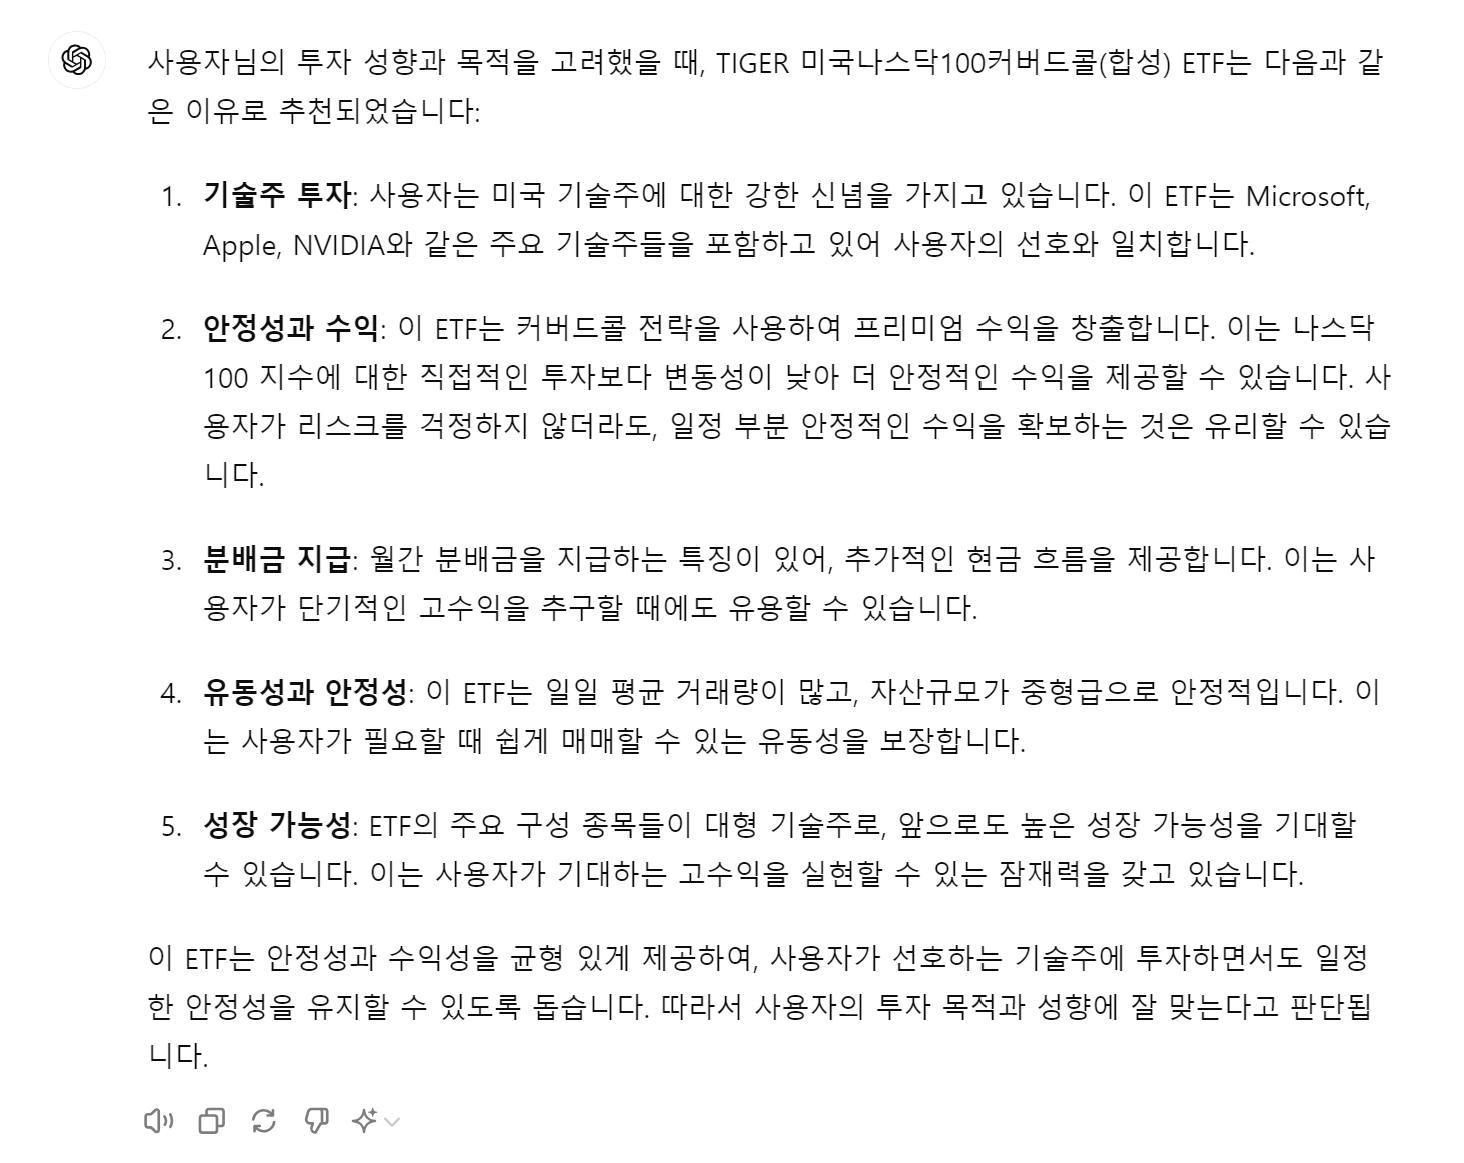

In [ ]:
df_3_sorted.iloc[-1]['summary'] # 비추천 (worst)

'TIGER 27-04회사채(A+이상)액티브 ETF는 국내 채권을 기초자산으로 하는 액티브 ETF로서, 일정 조건을 충족하는 A+ 등급 이상의 금융채 및 회사채 종목들을 담고 있습니다. \n\n운용 기간이 짧아 장기적인 성과를 판단하기에는 이르지만, 단기적인 운용 성과는 기초지수인 KIS 회사채2704만기형지수와 거의 비슷한 수준을 보여주고 있습니다. 또한, 현재까지의 변동성은 지수 대비 낮게 나타나 상대적으로 안정적인 모습을 보이고 있습니다.\n\n보유 채권의 듀레이션은 약 2.97년으로, 중기 채권 중심의 포트폴리오를 구성하고 있습니다. 이러한 포트폴리오는 금리 상승기에 높은 이자 수익을 얻을 수 있는 반면, 금리 하락기에는 가격 하락으로 인한 손실 위험이 존재합니다. 따라서, 투자 전에 금리 전망을 고려하여 적절한 타이밍에 투자하는 것이 중요합니다.\n\nETF의 총보수율은 연 0.10%로, 동일한 유형의 타사 ETF 대비 저렴한 편입니다. 또한, 하루 평균 4만 4천 주 이상의 거래량을 기록하고 있어 유동성이 충분하다고 볼 수 있습니다. 다만, 아직까지 자산 규모가 크지 않아 향후 성장 가능성을 지켜볼 필요가 있습니다.\n\n개별 채권 종목에 비해 유동성이 뛰어나며, 소액으로도 다양한 채권에 분산투자할 수 있다는 장점이 있습니다. 또한, 만기 매칭을 통해 만기수익률을 실현할 수 있고, 금리 하락 시 매도를 통해 자본차익을 추구할 수도 있습니다. 하지만, 액티브 ETF이기 때문에 운용사의 운용 능력에 따라 성과가 달라질 수 있으므로, 운용 내역을 주기적으로 모니터링하는 것이 좋습니다.\n\n종합적으로, TIGER 27-04회사채(A+이상)액티브 ETF는 국내 채권 시장에 관심 있는 투자자들에게 좋은 선택지 중 하나라고 할 수 있습니다. 특히, 만기 매칭 전략을 활용하여 안정적인 수익을 추구하는 투자자들에게 적합합니다. 단, 금리 변동에 따른 가격 변동 위험이 있으므로, 투자 전에 충분한 검토와 분석이 필요합니다.'

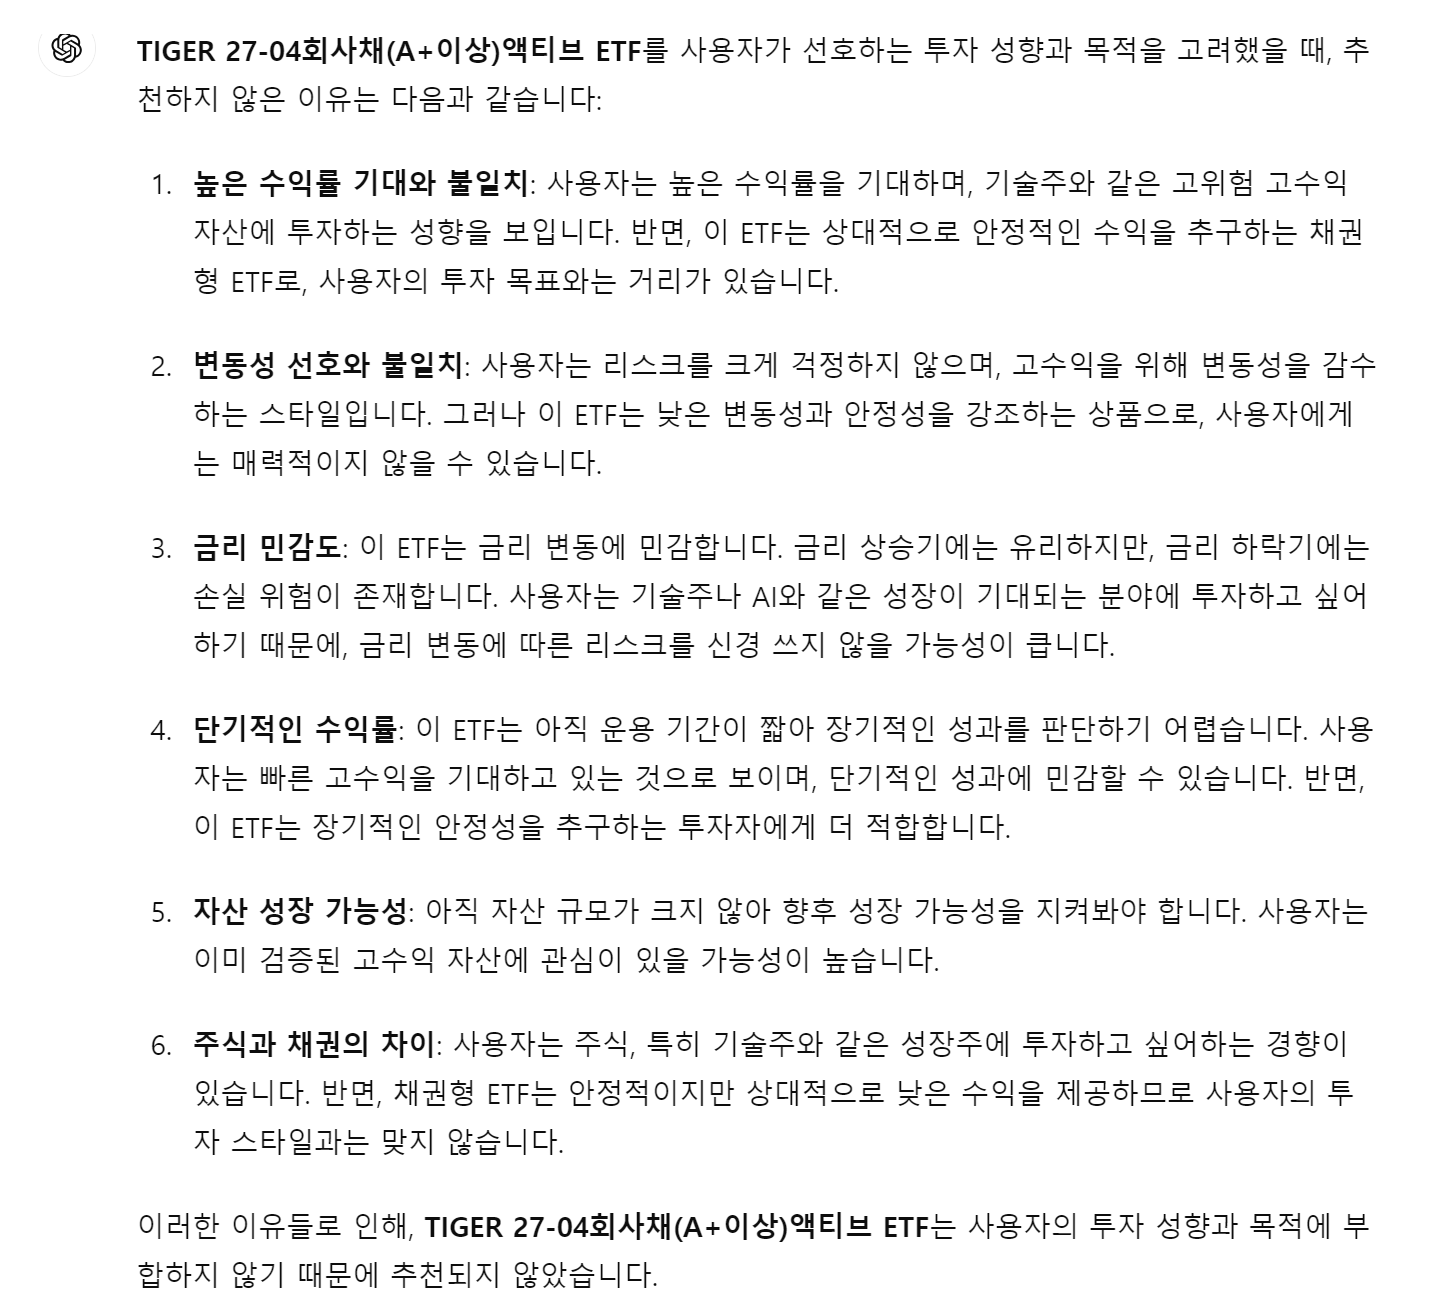

### content only

In [ ]:
# safe

cosine_similarities_1 = cosine_similarity([safe_conversation_embedding], np.array(embedding_data_1)).flatten()
df_1['cosine_similarity'] = cosine_similarities_1
df_1_sorted = df_1.sort_values(by='cosine_similarity', ascending=False)

df_1_sorted

,code,month,content,content_embedding,summary,summary_embedding,pca_one,pca_two,cluster,cosine_similarity
13,166400,2405,코스피200 커버드콜5% OTM지수는 KOSPI200을 복제하는 주식 포트폴리오를 ...,"[-2.5683594, 0.099853516, -0.6118164, 0.090637...","**TIGER 200커버드콜5%OTM ETF** 는 코스피200 지수를 추적하며, ...","[-2.0878906, -0.2861328, -0.61328125, 0.735351...",11.537677,5.543309,2,0.614046
21,292560,2405,TIGER 일본엔선물 ETF는 엔선물지수를 기초지수로 하여 투자신탁재산의 대부분을 ...,"[-0.6660156, -0.9243164, -0.23132324, 0.582031...","TIGER 일본엔선물 ETF의 운용성과를 분석해보면, 최근 1년 동안 약 9%의 수...","[-0.8486328, -0.6069336, -0.5566406, 1.0458984...",-4.716656,10.318715,0,0.602818
10,447770,2405,FnGuide 테슬라채권혼합지수는 해외주식 테슬라(Tesla)와 국내채권 두 종류의...,"[-0.86376953, -1.1220703, -0.5654297, -0.10638...",TIGER 테슬라채권혼합Fn ETF는 테슬라 주식과 국내 채권에 분산 투자하는 상품...,"[-0.73291016, -0.8383789, -0.1685791, 0.438476...",7.052231,-0.126298,2,0.596772
20,139310,2405,TIGER 금속선물(H) ETF는 S&P GSCI Industrial Metals ...,"[-1.3984375, -0.88671875, -0.63623047, 0.85302...",TIGER 금속선물(H) ETF는 금속 선물에 대한 투자 기회를 제공하는 상품으로서...,"[-1.6582031, -0.6694336, -0.6953125, 0.9912109...",-7.902317,6.611052,0,0.585865
17,458730,2405,TIGER 미국배당다우존스 ETF는 Dow Jones U.S. Dividend 10...,"[-2.0976562, -0.92578125, -0.30371094, 0.19409...",TIGER 미국배당 다우존스 ETF는 꾸준한 배당 성장과 함께 탄탄한 재무구조를 갖...,"[-1.8886719, -0.7578125, -0.32641602, 0.292968...",1.348926,0.760479,1,0.580320
12,105010,2405,TIGER 라틴35 ETF의 기초지수는 BNY Latin America 35 ADR...,"[-0.9370117, -1.3925781, -0.3046875, 0.5180664...","TIGER 라틴35 ETF는 라틴아메리카 지역의 주식 시장에 투자하는 ETF로서, ...","[-1.4101562, -1.3144531, -0.25976562, 0.980957...",0.409698,-0.055621,1,0.579086
14,448300,2405,TIGER 미국나스닥100TR(H) ETF는 NASDAQ-100 Total Retu...,"[-2.0234375, -1.4140625, 0.32983398, 1.2246094...",TIGER 미국나스닥100TR(H) ETF는 나스닥 100 지수를 추적하는 ETF로...,"[-2.0097656, -1.3837891, -0.45751953, 1.212890...",0.223068,0.815990,1,0.571631
1,394670,2405,TIGER 글로벌리튬&2차전지SOLACTIVE(합성) ETF는 Solactive G...,"[-1.2216797, -0.3486328, -0.32495117, -0.13232...",TIGER 글로벌리튬&2차전지SOLACTIVE(합성) ETF는 최근 각광받고 있는 ...,"[-1.6972656, 0.48706055, -0.19335938, 0.385742...",-1.729446,-7.308232,1,0.569249
16,195920,2405,TIGER 일본TOPIX(합성H) ETF는 일본의 TOPIX Index를 기초지수로...,"[-1.1806641, -1.8583984, -0.14257812, 0.867675...","TIGER 일본TOPIX(합성H) ETF는 일본 주식 시장에 투자하는 ETF로서, ...","[-1.0898438, -1.4404297, -0.17175293, 1.285156...",-3.625717,5.162807,0,0.562016
9,451540,2405,TIGER 종합채권(AA-이상)액티브 ETF는 KIS 종합채권AA-이상총수익지수(T...,"[-0.84033203, -0.9213867, 0.024810791, 0.45581...",TIGER 종합채권(AA-이상)액티브 ETF는 국내 채권 시장에 투자하는 ETF로서...,"[-0.5317383, -1.0263672, -0.033935547, 0.60791...",-6.306569,-4.742581,1,0.558709


In [ ]:
safe_comment

'저는 45세의 중학교 교사로, 안정적인 월급을 받고 있습니다. 가족은 아내와 두 아이가 있으며, 큰 재정적 변동 없이 안정적인 생활을 유지하고 싶습니다. 현재 주택 대출이 조금 남아있어, 큰 위험을 감수하기보다는 꾸준히 조금씩 수익을 얻을 수 있는 상품을 선호합니다. 주식 시장의 변동성에 너무 크게 영향을 받지 않는, 상대적으로 안정적인 상품을 원합니다. 예를 들어, 배당금을 꾸준히 지급하는 우량 기업에 투자하는 ETF나, 정부 발행 채권에 투자하는 ETF가 좋을 것 같습니다.'

In [ ]:
df_1_sorted.iloc[0]['summary']

'TIGER 일본엔선물 ETF의 운용성과를 분석해보면, 최근 1년 동안 약 9%의 수익률을 기록했습니다. 이는 같은 기간 동안 일본 엔화 선물 지수가 상승한 것에 기인합니다. \n\n비용 측면에서는 TER이 0.50%로 다소 높은 편입니다. 이는 비슷한 유형의 ETF 중에서도 높은 편에 속합니다. 따라서 비용 효율성 면에서는 다소 불리할 수 있습니다.\n\n일일 평균 거래량은 4만 주 정도로, 유동성은 보통 수준입니다. 하지만 특정 상황에서는 거래량이 부족하여 원하는 가격에 거래하기 어려울 수 있습니다.\n\nETF가 추종하는 기초 자산은 일본 엔화 선물입니다. 일본 엔화는 세계적으로 널리 사용되는 통화 중 하나이며, 경제적 불확실성이 높아질 때 안전 자산으로 선호되는 경향이 있습니다. 그러나 환율은 예측하기 어렵고, 변동성이 높을 수 있으므로 투자 시 주의가 필요합니다.\n\n배당 수익률은 0%로, 배당을 지급하지 않습니다. 그러므로 추가적인 수익을 기대하기는 어렵습니다.\n\n자산 규모는 약 300억 원으로, 대형 ETF에 속하며, 유동성과 안정성도 상대적으로 높습니다.\n\n종합적으로 볼 때, TIGER 일본엔선물 ETF는 일본 엔화 선물에 투자하여 수익을 추구하는 상품으로서, 일정 수준의 수익률을 기록하고 있지만, 비용 효율성이 낮고 유동성이 부족하다는 단점이 있습니다. 또한, 환율 변동성에 따라 수익률이 크게 변동할 수 있으므로, 투자 전에 충분한 검토와 분석이 필요합니다.  특히 환헤지를 하지 않는 상품이므로 엔화 가치 하락에 따른 손실 가능성에도 유의해야 합니다.'

In [ ]:
df_1_sorted.iloc[1]['summary']

'TIGER 테슬라채권혼합Fn ETF는 테슬라 주식과 국내 채권에 분산 투자하는 상품으로, 다양한 장점을 가지고 있습니다.\n\n먼저, 높은 수익률을 기대할 수 있습니다. 테슬라는 전기차 시장에서 선두 기업 중 하나로, 지속적인 성장이 예상됩니다. 또한, 국내 채권은 안정적인 수익을 제공하는 자산으로, 포트폴리오의 안정성을 높여줍니다. 실제로 최근 1년간 약 1.85%의 수익률을 기록했습니다.\n\n두 번째로, 낮은 비용 부담도 매력적입니다. 총 보수율이 연 0.25%로, 다른 유사한 ETF에 비해 상대적으로 낮습니다. 이로 인해 투자자들은 더 많은 수익을 얻을 수 있습니다.\n\n세 번째로는 풍부한 유동성을 자랑합니다. 하루 평균 거래량이 12만 주 이상으로, 투자자들이 언제든지 쉽게 거래할 수 있습니다. 이를 통해 투자자는 원하는 시점에 매도하거나 매수할 수 있어 편리합니다.\n\n네 번째 특징으로는 안정적인 자산 배분을 들 수 있습니다. 테슬라 주식과 국내 채권에 분산 투자함으로써, 단일 자산에 집중 투자하는 것보다 위험을 줄일 수 있습니다. 특히, 금리 상승 등의 시장 변동성에 대한 대응력이 높습니다.\n\n마지막으로, 연금 계좌에서도 투자가 가능하다는 점이 큰 장점입니다. 퇴직연금 내 100%까지 투자 할 수 있으며, 이를 통해 장기적인 관점에서 안정적인 수익을 추구할 수 있습니다.\n\n위의 요소들을 종합적으로 고려해보면, TIGER 테슬라채권혼합Fn ETF는 적극 추천할 만한 상품입니다. 테슬라 주식과 국내 채권에 분산 투자하여 높은 수익률과 안정성을 동시에 추구할 수 있으며, 저렴한 비용과 풍부한 유동성 역시 매력적입니다. 다만, 투자 전에는 자신의 투자 목적과 자금 상황을 고려하여 적절한 투자 계획을 세우는 것이 중요합니다.'

In [ ]:
# risk

cosine_similarities_1 = cosine_similarity([risk_conversation_embedding], np.array(embedding_data_1)).flatten()
df_1['cosine_similarity'] = cosine_similarities_1
df_1_sorted = df_1.sort_values(by='cosine_similarity', ascending=False)

df_1_sorted

,code,month,content,content_embedding,summary,summary_embedding,pca_one,pca_two,cluster,cosine_similarity
15,195930,2405,TIGER 유로스탁스50(합성H) ETF는 EURO STOXX 50 Index를 기...,"[-0.5258789, -1.3505859, -0.4790039, 1.6386719...",TIGER 유로스탁스50(합성H) ETF는 EURO STOXX 50 Index를 기...,"[-0.8041992, -0.65283203, -0.37768555, 1.79199...",-6.886231,3.064414,0,0.576505
20,139310,2405,TIGER 금속선물(H) ETF는 S&P GSCI Industrial Metals ...,"[-1.3984375, -0.88671875, -0.63623047, 0.85302...",TIGER 금속선물(H) ETF는 금속 선물에 대한 투자 기회를 제공하는 상품으로서...,"[-1.6582031, -0.6694336, -0.6953125, 0.9912109...",-7.902317,6.611052,0,0.565685
16,195920,2405,TIGER 일본TOPIX(합성H) ETF는 일본의 TOPIX Index를 기초지수로...,"[-1.1806641, -1.8583984, -0.14257812, 0.867675...","TIGER 일본TOPIX(합성H) ETF는 일본 주식 시장에 투자하는 ETF로서, ...","[-1.0898438, -1.4404297, -0.17175293, 1.285156...",-3.625717,5.162807,0,0.563581
14,448300,2405,TIGER 미국나스닥100TR(H) ETF는 NASDAQ-100 Total Retu...,"[-2.0234375, -1.4140625, 0.32983398, 1.2246094...",TIGER 미국나스닥100TR(H) ETF는 나스닥 100 지수를 추적하는 ETF로...,"[-2.0097656, -1.3837891, -0.45751953, 1.212890...",0.223068,0.815990,1,0.559961
23,466950,2405,TIGER 글로벌AI액티브 ETF는 Indxx Artificial Intellige...,"[-1.6074219, -1.0820312, 0.30664062, 0.5483398...",TIGER 글로벌AI액티브 ETF는 인공지능과 빅데이터 관련 기업들로 구성된 지수를...,"[-1.9863281, -0.9086914, -0.21533203, 0.291503...",-1.652242,-3.764791,1,0.557952
18,276000,2405,TIGER 글로벌자원생산기업(합성H) ETF는 MorningStar Global U...,"[-0.59472656, -1.1230469, -0.02053833, 0.71337...",TIGER 글로벌자원생산기업(합성H) ETF는 다양한 자원 관련 산업에서 업스트림 ...,"[-0.8935547, -1.1767578, -0.31225586, 0.976562...",-6.662109,1.243275,0,0.552405
4,463250,2405,TIGER 스페이스테크iSelect ETF는 iSelect 스페이스테크지수를 기초지...,"[-2.3847656, -0.3503418, -0.5131836, 0.5874023...","TIGER 스페이스테크iSelect ETF는 국내 우주항공, 인공지능, 로봇 및 3...","[-2.7695312, 0.17663574, -0.46264648, 0.409912...",1.357233,-0.083489,1,0.547255
2,364990,2405,TIGER 게임 TOP10 ETF는 KRX 게임 TOP 10 지수를 기초지수로 하여...,"[-1.0996094, -0.70996094, -0.29370117, 0.71093...",TIGER 게임 TOP10 ETF는 국내 게임 산업을 대표하는 종목들에 분산투자할 ...,"[-1.5673828, -0.5332031, -1.1533203, 0.7495117...",-1.983362,3.470841,0,0.540963
12,105010,2405,TIGER 라틴35 ETF의 기초지수는 BNY Latin America 35 ADR...,"[-0.9370117, -1.3925781, -0.3046875, 0.5180664...","TIGER 라틴35 ETF는 라틴아메리카 지역의 주식 시장에 투자하는 ETF로서, ...","[-1.4101562, -1.3144531, -0.25976562, 0.980957...",0.409698,-0.055621,1,0.539536
11,245360,2405,TIGER 차이나HSCEI ETF는 Hang Seng China H지수를 기초지수로...,"[-1.421875, -0.94970703, -0.37329102, 0.661132...",TIGER 차이나HSCEI ETF는 홍콩거래소에 상장된 중국 기업 중 대형주 중심으...,"[-1.5644531, -0.30981445, -1.0673828, 0.934570...",2.584169,0.704027,1,0.537746


In [ ]:
risk_comment

'저는 35세의 IT 기업에서 일하는 중간 관리자입니다. 현재 미혼이며, 월급 외에도 주식과 암호화폐 등 다양한 투자에서 수익을 내고 있습니다. 리스크를 감수할 수 있는 여유 자금이 꽤 있습니다. 저는 높은 수익을 기대하며, 어느 정도의 리스크를 감수할 준비가 되어 있습니다. 주식 시장의 급격한 변화에도 빠르게 대응할 수 있는, 성장 가능성이 높은 분야에 투자하는 ETF가 좋을 것 같습니다. 예를 들어, 기술주 중심의 ETF나 신흥 시장에 투자하는 ETF를 원합니다.'

In [ ]:
df_1_sorted.iloc[0]['summary']

'TIGER 유로스탁스50(합성H) ETF는 EURO STOXX 50 Index를 기초지수로 하는 합성형 ETF로서, 국내에서도 유럽 증시에 쉽게 투자할 수 있는 수단을 제공합니다. \n\n과거 수익률 데이터를 보면, 해당 ETF는 대체로 기초지수인 EURO STOXX 50 Index와 유사한 성과를 보여주고 있습니다. 특히 2020년 이후에는 큰 폭의 상승을 기록하며 높은 수익률을 달성했습니다. 다만, 환율 변동에 노출되어 있으므로 환헤지 여부를 고려해야 합니다.\n\n비용 측면에서는 TER이 연 0.24%로 상대적으로 낮은 편이어서 비용 효율성이 높다고 할 수 있습니다. 또한, 일일 평균 거래량도 13,755주로 충분한 유동성을 갖추고 있다고 판단됩니다.\n\n해당 ETF는 주식이라는 위험자산에 투자하므로 손실가능성이 있으며, 해외 펀드이므로 외화 관련 수수료가 발생할 수 있고, 과세기준 및 과세방법은 향후 세법개정 등에 따라 변동될 수 있음을 유의해야 합니다.\n\n유럽 경제 회복 기대감이나 유로화 강세 예상 시 유리한 선택이 될 수 있으나, 경기 침체나 정치적 리스크 등의 요인들을 고려해야 합니다. 이를 바탕으로 보았을 때, TIGER 유로스탁스50(합성H) ETF는 유럽 지역에 대한 분산투자를 원하는 투자자에게 적합한 상품이라고 볼 수 있습니다.'

In [ ]:
df_1_sorted.iloc[1]['summary']

'TIGER 금속선물(H) ETF는 금속 선물에 대한 투자 기회를 제공하는 상품으로서, 특히 산업용 금속인 구리, 알루미늄, 니켈에 집중되어 있습니다. 이러한 금속들은 경제 활동에서 중요한 역할을 하며, 그 수요는 글로벌 경제 성장과 함께 증가할 것으로 예상됩니다.\n\n과거 수익률 데이터를 보면, 해당 ETF는 시장 벤치마크 대비 상대적으로 높은 성과를 보여주고 있습니다. 특히 최근 3개월 동안 20.09%의 수익률을 기록하며, 이는 벤치마크 대비 우수한 성과입니다. 그러나 설정 이후 수익률은 -35.05%로 다소 부진한 모습을 보이고 있어 장기적인 투자 관점에서는 주의가 필요합니다.\n\nETF의 운용 비용 비율은 연 0.69%로, 다른 유사한 ETF와 비교해보면 중간 수준입니다. 따라서 비용 측면에서는 크게 경쟁력이 있다고 보기는 어렵습니다.\n\n일일 평균 거래량은 6,077주로, 유동성 수준은 보통이라고 할 수 있습니다. 하지만 대규모 거래를 원하는 투자자들에게는 충분한 유동성이 제공되지 않을 수 있으므로 주의해야 합니다.\n\n해당 ETF는 금속 선물에 투자하기 때문에 현물 가격과는 차이가 있을 수 있으며, 선물 만기 시에는 롤오버 비용이 발생할 수 있다는 점을 유의해야 합니다. 또한 금속 시장은 변동성이 높기 때문에 투자 전에 충분한 조사와 분석이 필요합니다.\n\n결론적으로, TIGER 금속선물(H) ETF는 금속 선물에 대한 투자 기회를 제공하는 상품으로서, 산업용 금속에 관심 있는 투자자들에게 적합합니다. 다만, 투자 전에 펀드의 구조와 리스크를 충분히 이해하고, 자신의 투자 목적과 자금 상황에 맞게 투자 계획을 세우는 것이 중요합니다.'

### summary only

In [ ]:
# safe

cosine_similarities_2 = cosine_similarity([safe_conversation_embedding], np.array(embedding_data_2)).flatten()
df_2['cosine_similarity'] = cosine_similarities_2
df_2_sorted = df_2.sort_values(by='cosine_similarity', ascending=False)

df_2_sorted

,code,month,content,content_embedding,summary,summary_embedding,pca_one,pca_two,cluster,cosine_similarity
20,139310,2405,TIGER 금속선물(H) ETF는 S&P GSCI Industrial Metals ...,"[-1.3984375, -0.88671875, -0.63623047, 0.85302...",TIGER 금속선물(H) ETF는 금속 선물에 대한 투자 기회를 제공하는 상품으로서...,"[-1.6582031, -0.6694336, -0.6953125, 0.9912109...",-3.310224,-3.132213,0,0.616164
13,166400,2405,코스피200 커버드콜5% OTM지수는 KOSPI200을 복제하는 주식 포트폴리오를 ...,"[-2.5683594, 0.099853516, -0.6118164, 0.090637...","**TIGER 200커버드콜5%OTM ETF** 는 코스피200 지수를 추적하며, ...","[-2.0878906, -0.2861328, -0.61328125, 0.735351...",0.537602,2.851106,1,0.613599
21,292560,2405,TIGER 일본엔선물 ETF는 엔선물지수를 기초지수로 하여 투자신탁재산의 대부분을 ...,"[-0.6660156, -0.9243164, -0.23132324, 0.582031...","TIGER 일본엔선물 ETF의 운용성과를 분석해보면, 최근 1년 동안 약 9%의 수...","[-0.8486328, -0.6069336, -0.5566406, 1.0458984...",-3.900925,-4.073764,0,0.611640
14,448300,2405,TIGER 미국나스닥100TR(H) ETF는 NASDAQ-100 Total Retu...,"[-2.0234375, -1.4140625, 0.32983398, 1.2246094...",TIGER 미국나스닥100TR(H) ETF는 나스닥 100 지수를 추적하는 ETF로...,"[-2.0097656, -1.3837891, -0.45751953, 1.212890...",0.963258,0.387939,2,0.598356
0,377990,2405,TIGER Fn신재생에너지는 FnGuide 신재생에너지지수를 기초지수로 하여 1주당...,"[-1.5927734, -0.69677734, -0.8979492, 0.309082...",TIGER Fn신재생에너지는 한국 주식 시장에서 신재생 에너지 분야에 투자하는 ET...,"[-1.5947266, -0.0047912598, -0.6347656, 0.2025...",1.489609,-3.285653,2,0.598033
12,105010,2405,TIGER 라틴35 ETF의 기초지수는 BNY Latin America 35 ADR...,"[-0.9370117, -1.3925781, -0.3046875, 0.5180664...","TIGER 라틴35 ETF는 라틴아메리카 지역의 주식 시장에 투자하는 ETF로서, ...","[-1.4101562, -1.3144531, -0.25976562, 0.980957...",-4.034155,-5.360495,0,0.593532
1,394670,2405,TIGER 글로벌리튬&2차전지SOLACTIVE(합성) ETF는 Solactive G...,"[-1.2216797, -0.3486328, -0.32495117, -0.13232...",TIGER 글로벌리튬&2차전지SOLACTIVE(합성) ETF는 최근 각광받고 있는 ...,"[-1.6972656, 0.48706055, -0.19335938, 0.385742...",2.547998,-1.167382,2,0.593471
19,139250,2405,코스피200 에너지/화학지수는 당해연도 정기심의에서 선정된 KOSPI200 구성종목...,"[-1.9414062, 0.32666016, -0.5649414, -0.025848...",TIGER 200 에너지화학 ETF는 코스피200 에너지/화학지수를 추적하는 ETF...,"[-1.8017578, 0.23791504, -0.16748047, 0.087768...",2.622537,0.032347,2,0.592077
17,458730,2405,TIGER 미국배당다우존스 ETF는 Dow Jones U.S. Dividend 10...,"[-2.0976562, -0.92578125, -0.30371094, 0.19409...",TIGER 미국배당 다우존스 ETF는 꾸준한 배당 성장과 함께 탄탄한 재무구조를 갖...,"[-1.8886719, -0.7578125, -0.32641602, 0.292968...",-1.254633,-1.824931,0,0.591601
10,447770,2405,FnGuide 테슬라채권혼합지수는 해외주식 테슬라(Tesla)와 국내채권 두 종류의...,"[-0.86376953, -1.1220703, -0.5654297, -0.10638...",TIGER 테슬라채권혼합Fn ETF는 테슬라 주식과 국내 채권에 분산 투자하는 상품...,"[-0.73291016, -0.8383789, -0.1685791, 0.438476...",-3.373703,-2.953820,0,0.590933


In [ ]:
safe_comment

'저는 45세의 중학교 교사로, 안정적인 월급을 받고 있습니다. 가족은 아내와 두 아이가 있으며, 큰 재정적 변동 없이 안정적인 생활을 유지하고 싶습니다. 현재 주택 대출이 조금 남아있어, 큰 위험을 감수하기보다는 꾸준히 조금씩 수익을 얻을 수 있는 상품을 선호합니다. 주식 시장의 변동성에 너무 크게 영향을 받지 않는, 상대적으로 안정적인 상품을 원합니다. 예를 들어, 배당금을 꾸준히 지급하는 우량 기업에 투자하는 ETF나, 정부 발행 채권에 투자하는 ETF가 좋을 것 같습니다.'

In [ ]:
df_2_sorted.iloc[0]['summary']

'TIGER 금속선물(H) ETF는 금속 선물에 대한 투자 기회를 제공하는 상품으로서, 특히 산업용 금속인 구리, 알루미늄, 니켈에 집중되어 있습니다. 이러한 금속들은 경제 활동에서 중요한 역할을 하며, 그 수요는 글로벌 경제 성장과 함께 증가할 것으로 예상됩니다.\n\n과거 수익률 데이터를 보면, 해당 ETF는 시장 벤치마크 대비 상대적으로 높은 성과를 보여주고 있습니다. 특히 최근 3개월 동안 20.09%의 수익률을 기록하며, 이는 벤치마크 대비 우수한 성과입니다. 그러나 설정 이후 수익률은 -35.05%로 다소 부진한 모습을 보이고 있어 장기적인 투자 관점에서는 주의가 필요합니다.\n\nETF의 운용 비용 비율은 연 0.69%로, 다른 유사한 ETF와 비교해보면 중간 수준입니다. 따라서 비용 측면에서는 크게 경쟁력이 있다고 보기는 어렵습니다.\n\n일일 평균 거래량은 6,077주로, 유동성 수준은 보통이라고 할 수 있습니다. 하지만 대규모 거래를 원하는 투자자들에게는 충분한 유동성이 제공되지 않을 수 있으므로 주의해야 합니다.\n\n해당 ETF는 금속 선물에 투자하기 때문에 현물 가격과는 차이가 있을 수 있으며, 선물 만기 시에는 롤오버 비용이 발생할 수 있다는 점을 유의해야 합니다. 또한 금속 시장은 변동성이 높기 때문에 투자 전에 충분한 조사와 분석이 필요합니다.\n\n결론적으로, TIGER 금속선물(H) ETF는 금속 선물에 대한 투자 기회를 제공하는 상품으로서, 산업용 금속에 관심 있는 투자자들에게 적합합니다. 다만, 투자 전에 펀드의 구조와 리스크를 충분히 이해하고, 자신의 투자 목적과 자금 상황에 맞게 투자 계획을 세우는 것이 중요합니다.'

In [ ]:
df_2_sorted.iloc[1]['summary']

'**TIGER 200커버드콜5%OTM ETF** 는 코스피200 지수를 추적하며, 옵션 전략을 활용하여 추가적인 수익을 추구하는 상품입니다. \n\n과거 수익률을 살펴보면, 최근 1년 동안 약 9%의 수익률을 기록하였습니다. 이는 같은 기간 코스피200 지수의 수익률인 약 20%에 비해 다소 낮은 수준입니다. 하지만, 이러한 수익률 차이는 **해당 ETF가 옵션 전략을 활용하여 적극적으로 리스크를 관리하기 때문** 입니다. 또한, 꾸준한 분배금 지급을 통해 추가적인 수익을 제공하고 있습니다.\n\n운용 비용 비율은 연 0.40%로, 다른 유사한 ETF에 비해 상대적으로 높은 편입니다. 따라서 장기적인 투자를 고려하는 경우에는 비용 측면에서 경쟁력 있는 다른 ETF를 고려해보는 것이 좋습니다.\n\n일일 평균 거래량은 약 3만 주 정도로, 유동성 측면에서는 다소 부족한 모습을 보이고 있습니다.  \n\n추종하는 기초자산은 대형주 중심의 코스피200 지수이며, 국내 주식 시장의 대표적인 지수 중 하나입니다. 경기 민감주와 성장주 등 다양한 업종의 기업들이 포함되어 있어 분산투자 효과를 기대할 수 있습니다.\n\n배당 수익률은 2023년 기준으로 약 0.3% 로, 높지 않은 수준이지만, 일정한 주기로 분배금을 지급하므로 추가적인 수익을 얻을 수 있습니다.\n\n자산 규모는 2023년 12월 31일 기준으로 약 600억 원으로, 중형급 ETF에 속합니다. 충분한 유동성과 안정성을 갖추고 있다고 볼 수 있습니다.\n\n경기 상승기에 유리한 구조를 가지고 있으며, 하락장에서도 손실을 제한할 수 있다는 장점이 있습니다. 다만, 옵션 전략을 활용하기 때문에 일반적인 주식형 ETF에 비해 운용 비용이 높고, 단기적인 변동성이 높을 수 있으므로 주의가 필요합니다.\n\n종합적으로, TIGER 200커버드콜5%OTM ETF는 코스피200 지수를 추적하면서도 옵션 전략을 활용하여 추가적인 수익을 추구하는 상품입니다. 그러나 운용 비용이 높다는 점과 유동성이 다소 부족하다는 점은 

In [ ]:
# risk

cosine_similarities_2 = cosine_similarity([risk_conversation_embedding], np.array(embedding_data_2)).flatten()
df_2['cosine_similarity'] = cosine_similarities_2
df_2_sorted = df_2.sort_values(by='cosine_similarity', ascending=False)

df_2_sorted

,code,month,content,content_embedding,summary,summary_embedding,pca_one,pca_two,cluster,cosine_similarity
12,105010,2405,TIGER 라틴35 ETF의 기초지수는 BNY Latin America 35 ADR...,"[-0.9370117, -1.3925781, -0.3046875, 0.5180664...","TIGER 라틴35 ETF는 라틴아메리카 지역의 주식 시장에 투자하는 ETF로서, ...","[-1.4101562, -1.3144531, -0.25976562, 0.980957...",-4.034155,-5.360495,0,0.644618
20,139310,2405,TIGER 금속선물(H) ETF는 S&P GSCI Industrial Metals ...,"[-1.3984375, -0.88671875, -0.63623047, 0.85302...",TIGER 금속선물(H) ETF는 금속 선물에 대한 투자 기회를 제공하는 상품으로서...,"[-1.6582031, -0.6694336, -0.6953125, 0.9912109...",-3.310224,-3.132213,0,0.641228
0,377990,2405,TIGER Fn신재생에너지는 FnGuide 신재생에너지지수를 기초지수로 하여 1주당...,"[-1.5927734, -0.69677734, -0.8979492, 0.309082...",TIGER Fn신재생에너지는 한국 주식 시장에서 신재생 에너지 분야에 투자하는 ET...,"[-1.5947266, -0.0047912598, -0.6347656, 0.2025...",1.489609,-3.285653,2,0.640546
2,364990,2405,TIGER 게임 TOP10 ETF는 KRX 게임 TOP 10 지수를 기초지수로 하여...,"[-1.0996094, -0.70996094, -0.29370117, 0.71093...",TIGER 게임 TOP10 ETF는 국내 게임 산업을 대표하는 종목들에 분산투자할 ...,"[-1.5673828, -0.5332031, -1.1533203, 0.7495117...",1.202212,-3.107849,2,0.633205
16,195920,2405,TIGER 일본TOPIX(합성H) ETF는 일본의 TOPIX Index를 기초지수로...,"[-1.1806641, -1.8583984, -0.14257812, 0.867675...","TIGER 일본TOPIX(합성H) ETF는 일본 주식 시장에 투자하는 ETF로서, ...","[-1.0898438, -1.4404297, -0.17175293, 1.285156...",-5.958867,-4.961806,0,0.624472
23,466950,2405,TIGER 글로벌AI액티브 ETF는 Indxx Artificial Intellige...,"[-1.6074219, -1.0820312, 0.30664062, 0.5483398...",TIGER 글로벌AI액티브 ETF는 인공지능과 빅데이터 관련 기업들로 구성된 지수를...,"[-1.9863281, -0.9086914, -0.21533203, 0.291503...",8.383508,2.049451,2,0.624333
1,394670,2405,TIGER 글로벌리튬&2차전지SOLACTIVE(합성) ETF는 Solactive G...,"[-1.2216797, -0.3486328, -0.32495117, -0.13232...",TIGER 글로벌리튬&2차전지SOLACTIVE(합성) ETF는 최근 각광받고 있는 ...,"[-1.6972656, 0.48706055, -0.19335938, 0.385742...",2.547998,-1.167382,2,0.624151
14,448300,2405,TIGER 미국나스닥100TR(H) ETF는 NASDAQ-100 Total Retu...,"[-2.0234375, -1.4140625, 0.32983398, 1.2246094...",TIGER 미국나스닥100TR(H) ETF는 나스닥 100 지수를 추적하는 ETF로...,"[-2.0097656, -1.3837891, -0.45751953, 1.212890...",0.963258,0.387939,2,0.622949
13,166400,2405,코스피200 커버드콜5% OTM지수는 KOSPI200을 복제하는 주식 포트폴리오를 ...,"[-2.5683594, 0.099853516, -0.6118164, 0.090637...","**TIGER 200커버드콜5%OTM ETF** 는 코스피200 지수를 추적하며, ...","[-2.0878906, -0.2861328, -0.61328125, 0.735351...",0.537602,2.851106,1,0.617895
15,195930,2405,TIGER 유로스탁스50(합성H) ETF는 EURO STOXX 50 Index를 기...,"[-0.5258789, -1.3505859, -0.4790039, 1.6386719...",TIGER 유로스탁스50(합성H) ETF는 EURO STOXX 50 Index를 기...,"[-0.8041992, -0.65283203, -0.37768555, 1.79199...",-5.914954,-1.447905,0,0.617181


In [ ]:
risk_comment

'저는 35세의 IT 기업에서 일하는 중간 관리자입니다. 현재 미혼이며, 월급 외에도 주식과 암호화폐 등 다양한 투자에서 수익을 내고 있습니다. 리스크를 감수할 수 있는 여유 자금이 꽤 있습니다. 저는 높은 수익을 기대하며, 어느 정도의 리스크를 감수할 준비가 되어 있습니다. 주식 시장의 급격한 변화에도 빠르게 대응할 수 있는, 성장 가능성이 높은 분야에 투자하는 ETF가 좋을 것 같습니다. 예를 들어, 기술주 중심의 ETF나 신흥 시장에 투자하는 ETF를 원합니다.'

In [ ]:
df_2_sorted.iloc[0]['summary']

'TIGER 라틴35 ETF는 라틴아메리카 지역의 주식 시장에 투자하는 ETF로서, 다양한 업종과 기업에 분산 투자하여 위험을 분산시키는 효과가 있습니다. 최근 2년간 분배 현황을 보면 꾸준히 분배금을 지급하고 있어 추가적인 수익 가능성도 존재합니다.\n\n비용 측면에서는 TER이 연 0.49%로 다소 높은 편이지만, 해외 주식에 투자하는 ETF라는 점을 감안하면 상대적으로 낮은 수준이라고 할 수 있습니다. 또한, 일일 평균 거래량이 4,633주로 적은 편이므로, 유동성 측면에서 주의가 필요합니다.\n\n해당 ETF는 글로벌 경제 성장세 지속 시 자원 가격 상승 수혜 예상되는 국가들에 투자할 수 있는 장점이 있으나, 정치적 이슈나 경기 변동성 등에 따라 수익률이 크게 변동할 수 있으므로 신중한 투자 결정이 필요합니다. \n\n종합적으로, TIGER 라틴35 ETF는 라틴아메리카 지역의 주식 시장에 대한 분산 투자를 원하는 투자자에게 적합한 상품입니다. 다만, 투자 전에 충분한 조사와 분석을 통해 투자 계획을 세우는 것이 중요합니다.'

In [ ]:
df_2_sorted.iloc[1]['summary']

'TIGER 금속선물(H) ETF는 금속 선물에 대한 투자 기회를 제공하는 상품으로서, 특히 산업용 금속인 구리, 알루미늄, 니켈에 집중되어 있습니다. 이러한 금속들은 경제 활동에서 중요한 역할을 하며, 그 수요는 글로벌 경제 성장과 함께 증가할 것으로 예상됩니다.\n\n과거 수익률 데이터를 보면, 해당 ETF는 시장 벤치마크 대비 상대적으로 높은 성과를 보여주고 있습니다. 특히 최근 3개월 동안 20.09%의 수익률을 기록하며, 이는 벤치마크 대비 우수한 성과입니다. 그러나 설정 이후 수익률은 -35.05%로 다소 부진한 모습을 보이고 있어 장기적인 투자 관점에서는 주의가 필요합니다.\n\nETF의 운용 비용 비율은 연 0.69%로, 다른 유사한 ETF와 비교해보면 중간 수준입니다. 따라서 비용 측면에서는 크게 경쟁력이 있다고 보기는 어렵습니다.\n\n일일 평균 거래량은 6,077주로, 유동성 수준은 보통이라고 할 수 있습니다. 하지만 대규모 거래를 원하는 투자자들에게는 충분한 유동성이 제공되지 않을 수 있으므로 주의해야 합니다.\n\n해당 ETF는 금속 선물에 투자하기 때문에 현물 가격과는 차이가 있을 수 있으며, 선물 만기 시에는 롤오버 비용이 발생할 수 있다는 점을 유의해야 합니다. 또한 금속 시장은 변동성이 높기 때문에 투자 전에 충분한 조사와 분석이 필요합니다.\n\n결론적으로, TIGER 금속선물(H) ETF는 금속 선물에 대한 투자 기회를 제공하는 상품으로서, 산업용 금속에 관심 있는 투자자들에게 적합합니다. 다만, 투자 전에 펀드의 구조와 리스크를 충분히 이해하고, 자신의 투자 목적과 자금 상황에 맞게 투자 계획을 세우는 것이 중요합니다.'

## filtering

In [ ]:
# 투자성향, 개인/퇴직연금, 기타 조건 고려

## answer to user

In [ ]:
# 추천 3~5개 & 상품 설명 (요약)